# **Load the data**

In [203]:
!dir

 Volume in drive C is OS
 Volume Serial Number is EAA2-550E

 Directory of C:\Users\Jaimin\market_analysis_project

10-04-2021  04:20 PM    <DIR>          .
10-04-2021  04:20 PM    <DIR>          ..
08-04-2021  10:44 AM    <DIR>          .ipynb_checkpoints
08-04-2021  10:46 AM            35,440 Code.ipynb
08-04-2021  10:32 AM    <DIR>          dataset
08-04-2021  10:32 AM            61,407 missing_value_handling.ipynb
10-04-2021  04:20 PM         6,750,106 project_code_1.ipynb
10-04-2021  02:58 PM    <DIR>          saved_dataframes
               3 File(s)      6,846,953 bytes
               5 Dir(s)  218,393,313,280 bytes free


In [204]:
project_dir = 'C:/Users/Jaimin/market_analysis_project'

In [205]:
dataset_file_csv = project_dir + '/dataset/Marketing_Analysis.csv'

In [206]:
import pandas as pd

df = pd.read_csv(dataset_file_csv)
df

C:\Users\Jaimin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


banking marketing Unnamed: 1                    Unnamed: 2  \
0      customer id and age.        NaN  Customer salary and balance.   
1                customerid        age                        salary   
2                         1         58                        100000   
3                         2         44                         60000   
4                         3         33                        120000   
...                     ...        ...                           ...   
45208                 45207         51                         60000   
45209                 45208         71                         55000   
45210                 45209         72                         55000   
45211                 45210         57                         20000   
45212                 45211         37                        120000   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN  Customer marital status and job with education...   
1        balance                                            marital   
2           2143                                            married   
3             29                                             single   
4              2                                            married   
...          ...                                                ...   
45208        825                                            married   
45209       1729                                           divorced   
45210       5715                                            married   
45211        668                                            married   
45212       2971                                            married   

                   Unnamed: 5                                  Unnamed: 6  \
0                         NaN  particular customer before targeted or not   
1                      jobedu                                    targeted   
2         management,tertiary                                         yes   
3        technician,secondary                                         yes   
4      entrepreneur,secondary                                         yes   
...                       ...                                         ...   
45208     technician,tertiary                                         yes   
45209         retired,primary                                         yes   
45210       retired,secondary                                         yes   
45211   blue-collar,secondary                                         yes   
45212  entrepreneur,secondary                                         yes   

      Unnamed: 7                          Unnamed: 8 Unnamed: 9   Unnamed: 10  \
0            NaN  Loan types: loans or housing loans        NaN  Contact type   
1        default                             housing       loan       contact   
2             no                                 yes         no       unknown   
3             no                                 yes         no       unknown   
4             no                                 yes        yes       unknown   
...          ...                                 ...        ...           ...   
45208         no                                  no         no      cellular   
45209         no                                  no         no      cellular   
45210         no                                  no         no      cellular   
45211         no                                  no         no     telephone   
45212         no                                  no         no      cellular   

      Unnamed: 11       Unnamed: 12           Unnamed: 13 Unnamed: 14  \
0             NaN  month of contact      duration of call         NaN   
1             day             month              duration    campaign   
2               5         may, 2017               261 sec           1   
3               5         may, 2017               151 sec           1   
4               5         may

### **Convert the data into appropriate format**

In [207]:
# remove first 2 row of the dataframe including heading which is not neccassary
new_header = df.iloc[1]
df = df[2:]
df.columns = new_header
df.reset_index(drop=True, inplace=True)
df

1     customerid age  salary balance   marital                  jobedu  \
0              1  58  100000    2143   married     management,tertiary   
1              2  44   60000      29    single    technician,secondary   
2              3  33  120000       2   married  entrepreneur,secondary   
3              4  47   20000    1506   married     blue-collar,unknown   
4              5  33       0       1    single         unknown,unknown   
...          ...  ..     ...     ...       ...                     ...   
45206      45207  51   60000     825   married     technician,tertiary   
45207      45208  71   55000    1729  divorced         retired,primary   
45208      45209  72   55000    5715   married       retired,secondary   
45209      45210  57   20000     668   married   blue-collar,secondary   
45210      45211  37  120000    2971   married  entrepreneur,secondary   

1     targeted default housing loan    contact day      month  \
0          yes      no     yes   no    unknown   5  may, 2017   
1          yes      no     yes   no    unknown   5  may, 2017   
2          yes      no     yes  yes    unknown   5  may, 2017   
3           no      no     yes   no    unknown   5  may, 2017   
4           no      no      no   no    unknown   5  may, 2017   
...        ...     ...     ...  ...        ...  ..        ...   
45206      yes      no      no   no   cellular  17  nov, 2017   
45207      yes      no      no   no   cellular  17  nov, 2017   
45208      yes      no      no   no   cellular  17  nov, 2017   
45209      yes      no      no   no  telephone  17  nov, 2017   
45210      yes      no      no   no   cellular  17  nov, 2017   

1                  duration campaign pdays previous poutcome response  
0                   261 sec        1    -1        0  unknown       no  
1                   151 sec        1    -1        0  unknown       no  
2                    76 sec        1    -1        0  unknown       no  
3                    92 sec        1    -1        0  unknown       no  
4                   198 sec        1    -1        0  unknown       no  
...                     ...      ...   ...      ...      ...      ...  
45206  16.2833333333333 min        3    -1        0  unknown      yes  
45207               7.6 min        2    -1        0  unknown      yes  
45208  18.7833333333333 min        5   184        3  success      yes  
45209  8.46666666666667 min        4    -1        0  unknown       no  
45210  6.01666666666667 min        2   188       11    other       no  

[45211 rows x 19 columns]

In [208]:
df.shape

(45211, 19)

In [209]:
df.describe()

1       customerid    age salary balance  marital               jobedu  \
count        45211  45191  45211   45211    45211                45211   
unique       45211    144     22   10334        3                   48   
top          44182     32  20000       0  married  management,tertiary   
freq             1   1509   7290    2767    27214                 7801   

1      targeted default housing   loan   contact    day      month duration  \
count     45211   45211   45211  45211     45211  45211      45161    45211   
unique        2       2       2      2         3     62         12     2646   
top         yes      no     yes     no  cellular     20  may, 2017  1.5 min   
freq      37091   44396   25130  37967     29285   2030      13747      138   

1      campaign  pdays previous poutcome response  
count     45211  45211    45211    45211    45181  
unique       66    836       71        4        2  
top           1     -1        0  unknown       no  
freq      11502  30277    30277    36959    39894

## **Data Cleaning**

In [210]:
# rename the columns name to be more specific
df.rename(columns={"customerid": "customer_id", "age": "age", "salary": "monthly_salary", "balance": "account_balance",
                   "marital": "marital_status", "jobedu": "job_education", "targeted": "targeted_customer_yn", "default": "default_yn", 
                   "housing": "house_loan_yn", "loan": "other_loan_yn", "contact": "contact_carrier", "day": "day_of_contact", 
                   "month": "month_year_of_contact", "duration": "call_duration", "campaign": "campaign", "pdays": "last_contacted_days", "previous": "total_previous_contact",
                   "poutcome": "last_contact_outcome", "response": "customer_responded_yn"}, inplace = True)

# here after column name 'yn' indicates that column has a value of yes and no only
df

C:\Users\Jaimin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


1     customer_id age monthly_salary account_balance marital_status  \
0               1  58         100000            2143        married   
1               2  44          60000              29         single   
2               3  33         120000               2        married   
3               4  47          20000            1506        married   
4               5  33              0               1         single   
...           ...  ..            ...             ...            ...   
45206       45207  51          60000             825        married   
45207       45208  71          55000            1729       divorced   
45208       45209  72          55000            5715        married   
45209       45210  57          20000             668        married   
45210       45211  37         120000            2971        married   

1               job_education targeted_customer_yn default_yn house_loan_yn  \
0         management,tertiary                  yes         no           yes   
1        technician,secondary                  yes         no           yes   
2      entrepreneur,secondary                  yes         no           yes   
3         blue-collar,unknown                   no         no           yes   
4             unknown,unknown                   no         no            no   
...                       ...                  ...        ...           ...   
45206     technician,tertiary                  yes         no            no   
45207         retired,primary                  yes         no            no   
45208       retired,secondary                  yes         no            no   
45209   blue-collar,secondary                  yes         no            no   
45210  entrepreneur,secondary                  yes         no            no   

1     other_loan_yn contact_carrier day_of_contact month_year_of_contact  \
0                no         unknown              5             may, 2017   
1                no         unknown              5             may, 2017   
2               yes         unknown              5             may, 2017   
3                no         unknown              5             may, 2017   
4                no         unknown              5             may, 2017   
...             ...             ...            ...                   ...   
45206            no        cellular             17             nov, 2017   
45207            no        cellular             17             nov, 2017   
45208            no        cellular             17             nov, 2017   
45209            no       telephone             17             nov, 2017   
45210            no        cellular             17             nov, 2017   

1             call_duration campaign last_contacted_days  \
0                   261 sec        1                  -1   
1                   151 sec        1                  -1   
2                    76 sec        1                  -1   
3                    92 sec        1                  -1   
4                   198 sec        1                  -1   
...                     ...      ...                 ...   
45206  16.2833333333333 min        3                  -1   
45207               7.6 min        2                  -1   
45208  18.7833333333333 min        5                 184   
45209  8.46666666666667 min        4                  -1   
45210  6.01666666666667 min        2                 188   

1     total_previous_contact last_contact_outcome customer_responded_yn  
0                          0              unknown                    no  
1                          0              unknown                    no  
2                          0              unknown                    no  
3                          0              unknown                    no  
4                          0              unknown                    no  
...                      ...                  ...                   ...  
45206                      0              unkn

In [211]:
df.info()

# as we can see every column has a data type of object. so we need to convert the data type into appropriate format
# next, there are total 19 columns and 45211 unique records
# also, there are some null values are in columns like age, month_year_of_contact, and customer_responded_yn.
# but, there are also some missing values available in the form of text 'unknown' and -1. so, we need to handle that as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             45211 non-null  object
 1   age                     45191 non-null  object
 2   monthly_salary          45211 non-null  object
 3   account_balance         45211 non-null  object
 4   marital_status          45211 non-null  object
 5   job_education           45211 non-null  object
 6   targeted_customer_yn    45211 non-null  object
 7   default_yn              45211 non-null  object
 8   house_loan_yn           45211 non-null  object
 9   other_loan_yn           45211 non-null  object
 10  contact_carrier         45211 non-null  object
 11  day_of_contact          45211 non-null  object
 12  month_year_of_contact   45161 non-null  object
 13  call_duration           45211 non-null  object
 14  campaign                45211 non-null  object
 15  la

In [212]:
df.describe()

# here we can see customer_id is unique. 
# customers who has age 32 are the most one in dataset
# around 16% of customers has salary of 20000
# around 6% of customers have 0 account balance
# more than half of the customers are married in the dataset
# 82% of customers are targeted customers
# 98% of customers does not have default account
# more than half of people have taken house loan and 83% of people does not taken any type of loan
# looks like if the customer has not been contacted before then the last_contacted_days value is -1
# there is not result has drawn from the last contact for 81% of customer
# most of the customer responded with no which are around 88%

1       customer_id    age monthly_salary account_balance marital_status  \
count         45211  45191          45211           45211          45211   
unique        45211    144             22           10334              3   
top           44182     32          20000               0        married   
freq              1   1509           7290            2767          27214   

1             job_education targeted_customer_yn default_yn house_loan_yn  \
count                 45211                45211      45211         45211   
unique                   48                    2          2             2   
top     management,tertiary                  yes         no           yes   
freq                   7801                37091      44396         25130   

1      other_loan_yn contact_carrier day_of_contact month_year_of_contact  \
count          45211           45211          45211                 45161   
unique             2               3             62                    12   
top               no        cellular             20             may, 2017   
freq           37967           29285           2030                 13747   

1      call_duration campaign last_contacted_days total_previous_contact  \
count          45211    45211               45211                  45211   
unique          2646       66                 836                     71   
top          1.5 min        1                  -1                      0   
freq             138    11502               30277                  30277   

1      last_contact_outcome customer_responded_yn  
count                 45211                 45181  
unique                    4                     2  
top                 unknown                    no  
freq                  36959                 39894

In [213]:
# make a new column indicates that has the customer taken any loan before or not, 
# this column will be the output column for our machine learning model to indicate that the customer has taken a loan or not

loan = []
for (house_loan, other_loan) in zip(df['house_loan_yn'], df['other_loan_yn']):
    if (house_loan == 'yes' or other_loan == 'yes'):
        loan.append('yes')
    else:
        loan.append('no')

df['loan'] = loan
df.describe()

# almost 60% of customers have taken a loan from the bank

<ipython-input-213-92fc64955ccf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan'] = loan


1       customer_id    age monthly_salary account_balance marital_status  \
count         45211  45191          45211           45211          45211   
unique        45211    144             22           10334              3   
top           44182     32          20000               0        married   
freq              1   1509           7290            2767          27214   

1             job_education targeted_customer_yn default_yn house_loan_yn  \
count                 45211                45211      45211         45211   
unique                   48                    2          2             2   
top     management,tertiary                  yes         no           yes   
freq                   7801                37091      44396         25130   

1      other_loan_yn contact_carrier day_of_contact month_year_of_contact  \
count          45211           45211          45211                 45161   
unique             2               3             62                    12   
top               no        cellular             20             may, 2017   
freq           37967           29285           2030                 13747   

1      call_duration campaign last_contacted_days total_previous_contact  \
count          45211    45211               45211                  45211   
unique          2646       66                 836                     71   
top          1.5 min        1                  -1                      0   
freq             138    11502               30277                  30277   

1      last_contact_outcome customer_responded_yn   loan  
count                 45211                 45181  45211  
unique                    4                     2      2  
top                 unknown                    no    yes  
freq                  36959                 39894  28007

In [214]:
df

1     customer_id age monthly_salary account_balance marital_status  \
0               1  58         100000            2143        married   
1               2  44          60000              29         single   
2               3  33         120000               2        married   
3               4  47          20000            1506        married   
4               5  33              0               1         single   
...           ...  ..            ...             ...            ...   
45206       45207  51          60000             825        married   
45207       45208  71          55000            1729       divorced   
45208       45209  72          55000            5715        married   
45209       45210  57          20000             668        married   
45210       45211  37         120000            2971        married   

1               job_education targeted_customer_yn default_yn house_loan_yn  \
0         management,tertiary                  yes         no           yes   
1        technician,secondary                  yes         no           yes   
2      entrepreneur,secondary                  yes         no           yes   
3         blue-collar,unknown                   no         no           yes   
4             unknown,unknown                   no         no            no   
...                       ...                  ...        ...           ...   
45206     technician,tertiary                  yes         no            no   
45207         retired,primary                  yes         no            no   
45208       retired,secondary                  yes         no            no   
45209   blue-collar,secondary                  yes         no            no   
45210  entrepreneur,secondary                  yes         no            no   

1     other_loan_yn contact_carrier day_of_contact month_year_of_contact  \
0                no         unknown              5             may, 2017   
1                no         unknown              5             may, 2017   
2               yes         unknown              5             may, 2017   
3                no         unknown              5             may, 2017   
4                no         unknown              5             may, 2017   
...             ...             ...            ...                   ...   
45206            no        cellular             17             nov, 2017   
45207            no        cellular             17             nov, 2017   
45208            no        cellular             17             nov, 2017   
45209            no       telephone             17             nov, 2017   
45210            no        cellular             17             nov, 2017   

1             call_duration campaign last_contacted_days  \
0                   261 sec        1                  -1   
1                   151 sec        1                  -1   
2                    76 sec        1                  -1   
3                    92 sec        1                  -1   
4                   198 sec        1                  -1   
...                     ...      ...                 ...   
45206  16.2833333333333 min        3                  -1   
45207               7.6 min        2                  -1   
45208  18.7833333333333 min        5                 184   
45209  8.46666666666667 min        4                  -1   
45210  6.01666666666667 min        2                 188   

1     total_previous_contact last_contact_outcome customer_responded_yn loan  
0                          0              unknown                    no  yes  
1                          0              unknown                    no  yes  
2                          0              unknown                    no  yes  
3                          0              unknown                    no  yes  
4                          0              unknown                    no   no  
...                      ...                  ...                   ...  ...  
45206      

In [215]:
print(df['job_education'])

0           management,tertiary
1          technician,secondary
2        entrepreneur,secondary
3           blue-collar,unknown
4               unknown,unknown
                  ...          
45206       technician,tertiary
45207           retired,primary
45208         retired,secondary
45209     blue-collar,secondary
45210    entrepreneur,secondary
Name: job_education, Length: 45211, dtype: object


In [216]:
# saparate job_education column into 2 different column named job and education
df['job'] = df['job_education'].apply(lambda x: x.split(',')[0])
df['education'] = df['job_education'].apply(lambda x: x.split(',')[1])

<ipython-input-216-b36382d38640>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job_education'].apply(lambda x: x.split(',')[0])
<ipython-input-216-b36382d38640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['job_education'].apply(lambda x: x.split(',')[1])


In [217]:
df['job'].unique()
# here we can see that 'admin.' job should be 'admin' only. so need to replace it

df['job'] = df['job'].apply(lambda x: x.replace('admin.', 'admin') if (x == 'admin.') else x)
df['job'].unique()

<ipython-input-217-8503ef5bc1b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].apply(lambda x: x.replace('admin.', 'admin') if (x == 'admin.') else x)


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [218]:
df['education'].unique()
# the 'unknown' should be replaced with null values. we will do it later.

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [219]:
# now there is no need of job_education column. so delete it
del df['job_education']

In [220]:
df

1     customer_id age monthly_salary account_balance marital_status  \
0               1  58         100000            2143        married   
1               2  44          60000              29         single   
2               3  33         120000               2        married   
3               4  47          20000            1506        married   
4               5  33              0               1         single   
...           ...  ..            ...             ...            ...   
45206       45207  51          60000             825        married   
45207       45208  71          55000            1729       divorced   
45208       45209  72          55000            5715        married   
45209       45210  57          20000             668        married   
45210       45211  37         120000            2971        married   

1     targeted_customer_yn default_yn house_loan_yn other_loan_yn  \
0                      yes         no           yes            no   
1                      yes         no           yes            no   
2                      yes         no           yes           yes   
3                       no         no           yes            no   
4                       no         no            no            no   
...                    ...        ...           ...           ...   
45206                  yes         no            no            no   
45207                  yes         no            no            no   
45208                  yes         no            no            no   
45209                  yes         no            no            no   
45210                  yes         no            no            no   

1     contact_carrier  ... month_year_of_contact         call_duration  \
0             unknown  ...             may, 2017               261 sec   
1             unknown  ...             may, 2017               151 sec   
2             unknown  ...             may, 2017                76 sec   
3             unknown  ...             may, 2017                92 sec   
4             unknown  ...             may, 2017               198 sec   
...               ...  ...                   ...                   ...   
45206        cellular  ...             nov, 2017  16.2833333333333 min   
45207        cellular  ...             nov, 2017               7.6 min   
45208        cellular  ...             nov, 2017  18.7833333333333 min   
45209       telephone  ...             nov, 2017  8.46666666666667 min   
45210        cellular  ...             nov, 2017  6.01666666666667 min   

1     campaign last_contacted_days total_previous_contact  \
0            1                  -1                      0   
1            1                  -1                      0   
2            1                  -1                      0   
3            1                  -1                      0   
4            1                  -1                      0   
...        ...                 ...                    ...   
45206        3                  -1                      0   
45207        2                  -1                      0   
45208        5                 184                      3   
45209        4                  -1                      0   
45210        2                 188                     11   

1     last_contact_outcome customer_responded_yn loan           job  education  
0                  unknown                    no  yes    management   tertiary  
1                  unknown                    no  yes    technician  secondary  
2                  unknown                    no  yes  entrepreneur  secondary  
3                  unknown                    no  yes   blue-collar    unknown  
4                  unknown                    no   no       unknown    unknown  
...                    ...                   ...  ...           ...        ...  
45206              unknown                   yes   no    technician   tertiary  
45207              unknown                   yes

In [221]:
df['month_year_of_contact'].unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [222]:
# we have filled to nan values with -1. so that while parsing this column we can handle error
df['month_year_of_contact'] = df['month_year_of_contact'].fillna('-1')
df['month_year_of_contact'].unique()

<ipython-input-222-5d57fa85448d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year_of_contact'] = df['month_year_of_contact'].fillna('-1')


array(['may, 2017', '-1', 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [223]:
# saparate month and year from the month_year_of_contact column
df['month_of_contact'] = df['month_year_of_contact'].apply(lambda x: x.split(',')[0].strip() if (not x == '-1') else x)
df['year_of_contact'] = df['month_year_of_contact'].apply(lambda x: x.split(',')[1].strip() if (not x == '-1') else x)

df.head()

<ipython-input-223-a3fb5961dff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_of_contact'] = df['month_year_of_contact'].apply(lambda x: x.split(',')[0].strip() if (not x == '-1') else x)
<ipython-input-223-a3fb5961dff6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_contact'] = df['month_year_of_contact'].apply(lambda x: x.split(',')[1].strip() if (not x == '-1') else x)


1 customer_id age monthly_salary account_balance marital_status  \
0           1  58         100000            2143        married   
1           2  44          60000              29         single   
2           3  33         120000               2        married   
3           4  47          20000            1506        married   
4           5  33              0               1         single   

1 targeted_customer_yn default_yn house_loan_yn other_loan_yn contact_carrier  \
0                  yes         no           yes            no         unknown   
1                  yes         no           yes            no         unknown   
2                  yes         no           yes           yes         unknown   
3                   no         no           yes            no         unknown   
4                   no         no            no            no         unknown   

1  ... campaign last_contacted_days total_previous_contact  \
0  ...        1                  -1                      0   
1  ...        1                  -1                      0   
2  ...        1                  -1                      0   
3  ...        1                  -1                      0   
4  ...        1                  -1                      0   

1 last_contact_outcome customer_responded_yn loan           job  education  \
0              unknown                    no  yes    management   tertiary   
1              unknown                    no  yes    technician  secondary   
2              unknown                    no  yes  entrepreneur  secondary   
3              unknown                    no  yes   blue-collar    unknown   
4              unknown                    no   no       unknown    unknown   

1 month_of_contact year_of_contact  
0              may            2017  
1              may            2017  
2              may            2017  
3              may            2017  
4              may            2017  

[5 rows x 23 columns]

In [224]:
# now delete the month_year_of_contact_comuln, which is not neccessary
del df['month_year_of_contact']

In [225]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'call_duration',
       'campaign', 'last_contacted_days', 'total_previous_contact',
       'last_contact_outcome', 'customer_responded_yn', 'loan', 'job',
       'education', 'month_of_contact', 'year_of_contact'],
      dtype='object', name=1)

In [226]:
df[['call_duration']]

1             call_duration
0                   261 sec
1                   151 sec
2                    76 sec
3                    92 sec
4                   198 sec
...                     ...
45206  16.2833333333333 min
45207               7.6 min
45208  18.7833333333333 min
45209  8.46666666666667 min
45210  6.01666666666667 min

[45211 rows x 1 columns]

In [227]:
# convert call_duration time in sec only
df['call_duration_sec'] = df['call_duration'].apply(lambda x: round(float(x.split(' ')[0].strip())) if (x.split(' ')[1] == 'sec') else round(float(x.split(' ')[0].strip()) * 60))
df['call_duration_sec']

<ipython-input-227-12fccdd7d27c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_duration_sec'] = df['call_duration'].apply(lambda x: round(float(x.split(' ')[0].strip())) if (x.split(' ')[1] == 'sec') else round(float(x.split(' ')[0].strip()) * 60))


0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: call_duration_sec, Length: 45211, dtype: int64

In [228]:
# now delete the call_duration column
del df['call_duration']

In [229]:
df

1     customer_id age monthly_salary account_balance marital_status  \
0               1  58         100000            2143        married   
1               2  44          60000              29         single   
2               3  33         120000               2        married   
3               4  47          20000            1506        married   
4               5  33              0               1         single   
...           ...  ..            ...             ...            ...   
45206       45207  51          60000             825        married   
45207       45208  71          55000            1729       divorced   
45208       45209  72          55000            5715        married   
45209       45210  57          20000             668        married   
45210       45211  37         120000            2971        married   

1     targeted_customer_yn default_yn house_loan_yn other_loan_yn  \
0                      yes         no           yes            no   
1                      yes         no           yes            no   
2                      yes         no           yes           yes   
3                       no         no           yes            no   
4                       no         no            no            no   
...                    ...        ...           ...           ...   
45206                  yes         no            no            no   
45207                  yes         no            no            no   
45208                  yes         no            no            no   
45209                  yes         no            no            no   
45210                  yes         no            no            no   

1     contact_carrier  ... last_contacted_days total_previous_contact  \
0             unknown  ...                  -1                      0   
1             unknown  ...                  -1                      0   
2             unknown  ...                  -1                      0   
3             unknown  ...                  -1                      0   
4             unknown  ...                  -1                      0   
...               ...  ...                 ...                    ...   
45206        cellular  ...                  -1                      0   
45207        cellular  ...                  -1                      0   
45208        cellular  ...                 184                      3   
45209       telephone  ...                  -1                      0   
45210        cellular  ...                 188                     11   

1     last_contact_outcome customer_responded_yn loan           job  \
0                  unknown                    no  yes    management   
1                  unknown                    no  yes    technician   
2                  unknown                    no  yes  entrepreneur   
3                  unknown                    no  yes   blue-collar   
4                  unknown                    no   no       unknown   
...                    ...                   ...  ...           ...   
45206              unknown                   yes   no    technician   
45207              unknown                   yes   no       retired   
45208              success                   yes   no       retired   
45209              unknown                    no   no   blue-collar   
45210                other                    no   no  entrepreneur   

1      education month_of_contact year_of_contact call_duration_sec  
0       tertiary              may            2017               261  
1      secondary              may            2017               151  
2      secondary              may            2017                76  
3        unknown              may            2017                92  
4        unknown              may            2017               198  
...          ...              ...             ...               ...  
45206   tertiary              nov            2017               977  
45207    primary            

In [230]:
# analyse montly_salary column
display(df['monthly_salary'].describe())
display(df['monthly_salary'].value_counts())

# no null values
# min is 0 and max is 120000
# most people has salary of 20000
# only 288 people have 0 salary
# type of this column is float

count     45211
unique       22
top       20000
freq       7290
Name: monthly_salary, dtype: object

20000     7290
60000     7036
100000    6890
50000     3517
70000     3078
100000    2568
20000     2442
60000     2140
50000     1654
55000     1267
120000    1189
70000     1076
55000      997
16000      987
8000       972
4000       620
8000       331
4000       318
120000     298
16000      253
0          222
0           66
Name: monthly_salary, dtype: int64

In [231]:
# importing the module
import numpy as np
  
# converting 'monthly_salary' from float to int
df['monthly_salary'] = df['monthly_salary'].apply(np.int64)
  
# displaying the datatypes
df.dtypes

<ipython-input-231-46dd2d4e60f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthly_salary'] = df['monthly_salary'].apply(np.int64)


1
customer_id               object
age                       object
monthly_salary             int64
account_balance           object
marital_status            object
targeted_customer_yn      object
default_yn                object
house_loan_yn             object
other_loan_yn             object
contact_carrier           object
day_of_contact            object
campaign                  object
last_contacted_days       object
total_previous_contact    object
last_contact_outcome      object
customer_responded_yn     object
loan                      object
job                       object
education                 object
month_of_contact          object
year_of_contact           object
call_duration_sec          int64
dtype: object

In [232]:
df['monthly_salary'].value_counts()

20000     9732
100000    9458
60000     9176
50000     5171
70000     4154
55000     2264
120000    1487
8000      1303
16000     1240
4000       938
0          288
Name: monthly_salary, dtype: int64

### **Replace all the missing values with NaN**

In [233]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact', 'last_contact_outcome',
       'customer_responded_yn', 'loan', 'job', 'education', 'month_of_contact',
       'year_of_contact', 'call_duration_sec'],
      dtype='object', name=1)

In [234]:
display('column: age', df['age'].unique())
display('column: monthly_salary', df['monthly_salary'].unique())
display('column: account_balance', df['account_balance'].unique())
display('column: marital_status', df['marital_status'].unique())
display('column: targeted_customer_yn', df['targeted_customer_yn'].unique())
display('column: default_yn', df['default_yn'].unique())
display('column: house_loan_yn', df['house_loan_yn'].unique())
display('column: other_loan_yn', df['other_loan_yn'].unique())
display('column: contact_carrier', df['contact_carrier'].unique())
display('column: day_of_contact', df['day_of_contact'].unique())
display('column: campaign', df['campaign'].unique())
display('column: last_contacted_days', df['last_contacted_days'].unique())
display('column: total_previous_contact', df['total_previous_contact'].unique())
display('column: last_contact_outcome', df['last_contact_outcome'].unique())
display('column: customer_responded_yn', df['customer_responded_yn'].unique())
display('column: loan', df['loan'].unique())
display('column: job', df['job'].unique())
display('column: education', df['education'].unique())
display('column: month_of_contact', df['month_of_contact'].unique())
display('column: year_of_contact', df['year_of_contact'].unique())
display('column: call_duration_sec', df['call_duration_sec'].unique())

'column: age'

array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', '49', '59', '37', '50', '54', '55', '48', '24', '38', '31',
       '30', '27', '34', '23', '26', nan, '61', '22', '21', '20', '66',
       '62', '83', '75', '67', '70', '65', '68', '64', '69', '72', '71',
       '19', '76', '85', '63', '90', '82', '73', '74', '78', '80', '94',
       '79', '77', '86', 51.0, 35.0, 30.0, 39.0, 29.0, 32.0, 38.0, 36.0,
       41.0, 34.0, 44.0, 33.0, 37.0, 61.0, 52.0, 46.0, 45.0, 71.0, 40.0,
       55.0, 31.0, 49.0, 43.0, 59.0, 24.0, 48.0, 42.0, 58.0, 27.0, 54.0,
       26.0, 25.0, 28.0, 47.0, 60.0, 50.0, 53.0, 57.0, 70.0, 23.0, 74.0,
       56.0, 21.0, 22.0, 66.0, 20.0, 78.0, 73.0, 69.0, 64.0, 63.0, 95.0,
       65.0, 67.0, 75.0, 82.0, 19.0, 81.0, 76.0, 62.0, 72.0, 77.0, 68.0,
       85.0, 83.0, 79.0, 80.0, 18.0, 89.0, 84.0, 86.0, 87.0, 92.0, 90.0,
       93.0, 88.0], dtype=object)

'column: monthly_salary'

array([100000,  60000, 120000,  20000,      0,  55000,  50000,  70000,
         8000,  16000,   4000], dtype=int64)

'column: account_balance'

array(['2143', '29', '2', ..., 3556, 4655, 1475], dtype=object)

'column: marital_status'

array(['married', 'single', 'divorced'], dtype=object)

'column: targeted_customer_yn'

array(['yes', 'no'], dtype=object)

'column: default_yn'

array(['no', 'yes'], dtype=object)

'column: house_loan_yn'

array(['yes', 'no'], dtype=object)

'column: other_loan_yn'

array(['no', 'yes'], dtype=object)

'column: contact_carrier'

array(['unknown', 'cellular', 'telephone'], dtype=object)

'column: day_of_contact'

array(['5', '6', '7', '8', '9', '12', '13', '14', '15', '16', '19', '20',
       '21', '23', '26', '27', '28', '29', '30', '2', '3', '4', '11',
       '17', '18', '24', '25', '1', '10', '22', '31', 17, 20, 21, 22, 23,
       24, 27, 28, 29, 30, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18, 25, 26,
       1, 2, 3, 9, 16, 19, 10, 31], dtype=object)

'column: campaign'

array(['1', '2', '3', '5', '4', '6', '7', '8', '9', '10', '11', '12',
       '13', '19', '14', '24', '16', '32', '18', '22', '15', '17', '25',
       '21', '43', '51', '63', '41', '26', '28', '55', '50', '38', '23',
       '20', '29', '31', '37', '30', '46', '27', '58', '33', '35', '34',
       '36', '39', '44', 3, 1, 4, 2, 9, 5, 6, 7, 12, 17, 8, 14, 16, 23,
       10, 11, 15, 13], dtype=object)

'column: last_contacted_days'

array(['-1', '151', '166', '91', '86', '143', '147', '89', '140', '176',
       '101', '174', '170', '167', '195', '165', '129', '188', '196',
       '172', '118', '119', '104', '171', '117', '164', '132', '131',
       '123', '159', '186', '111', '115', '116', '173', '178', '110',
       '152', '96', '103', '150', '175', '193', '181', '185', '154',
       '145', '138', '126', '180', '109', '158', '168', '97', '182',
       '127', '130', '194', '125', '105', '102', '26', '179', '28', '183',
       '155', '112', '120', '137', '124', '187', '190', '113', '162',
       '134', '169', '189', '8', '144', '191', '184', '177', '5', '99',
       '133', '93', '92', '10', '100', '156', '198', '106', '153', '146',
       '128', '7', '121', '160', '107', '90', '27', '197', '136', '139',
       '122', '157', '149', '135', '30', '114', '98', '192', '163', '34',
       '95', '141', '31', '199', '94', '108', '29', '268', '247', '253',
       '226', '244', '239', '245', '204', '231', '238', '258', '230'

'column: total_previous_contact'

array(['0', '3', '1', '4', '2', '11', '16', '6', '5', '10', '12', '7',
       '18', '9', '21', '8', '14', '15', '26', '37', '13', '25', '20',
       '27', '17', '23', '38', '29', '24', '51', '275', '22', 0, 7, 3, 2,
       4, 1, 20, 15, 11, 6, 9, 5, 10, 8, 19, 21, 18, 13, 12, 14, 23, 17,
       30, 29, 22, 16, 24, 38, 27, 58, 25, 28, 32, 26, 37, 40, 55, 35, 41],
      dtype=object)

'column: last_contact_outcome'

array(['unknown', 'failure', 'other', 'success'], dtype=object)

'column: customer_responded_yn'

array(['no', 'yes', nan], dtype=object)

'column: loan'

array(['yes', 'no'], dtype=object)

'column: job'

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

'column: education'

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

'column: month_of_contact'

array(['may', '-1', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan',
       'feb', 'mar', 'apr', 'sep'], dtype=object)

'column: year_of_contact'

array(['2017', '-1'], dtype=object)

'column: call_duration_sec'

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [235]:
df['account_balance'].isnull().sum()

0

In [236]:
df['call_duration_sec'].isnull().sum()

0

In [237]:
df[df['total_previous_contact'] == 0]

# this dataframe shows if the total_previous_contact is 0, then last_contacted_days column value will be -1.
# this means there is a correlation between last_contacted_days and total_previous_contact column

1     customer_id age  monthly_salary account_balance marital_status  \
32766       32767  51           20000             528        married   
32767       32768  35          100000            3217        married   
32769       32770  39           20000             390        married   
32771       32772  39          100000             315        married   
32772       32773  32          100000             703         single   
...           ...  ..             ...             ...            ...   
45203       45204  23            4000             113         single   
45205       45206  25           60000             505         single   
45206       45207  51           60000             825        married   
45207       45208  71           55000            1729       divorced   
45209       45210  57           20000             668        married   

1     targeted_customer_yn default_yn house_loan_yn other_loan_yn  \
32766                  yes         no           yes            no   
32767                  yes         no           yes           yes   
32769                  yes         no           yes            no   
32771                  yes         no           yes            no   
32772                   no         no           yes            no   
...                    ...        ...           ...           ...   
45203                   no         no            no            no   
45205                  yes         no            no           yes   
45206                  yes         no            no            no   
45207                  yes         no            no            no   
45209                  yes         no            no            no   

1     contact_carrier  ... last_contacted_days total_previous_contact  \
32766        cellular  ...                  -1                      0   
32767        cellular  ...                  -1                      0   
32769        cellular  ...                  -1                      0   
32771       telephone  ...                  -1                      0   
32772        cellular  ...                  -1                      0   
...               ...  ...                 ...                    ...   
45203        cellular  ...                  -1                      0   
45205        cellular  ...                  -1                      0   
45206        cellular  ...                  -1                      0   
45207        cellular  ...                  -1                      0   
45209       telephone  ...                  -1                      0   

1     last_contact_outcome customer_responded_yn loan          job  education  \
32766              unknown                    no  yes  blue-collar  secondary   
32767              unknown                    no  yes   management   tertiary   
32769              unknown                    no  yes  blue-collar    primary   
32771              unknown                    no  yes   management  secondary   
32772              unknown                    no  yes   management   tertiary   
...                    ...                   ...  ...          ...        ...   
45203              unknown                   yes   no      student   tertiary   
45205              unknown                   yes  yes   technician  secondary   
45206              unknown                   yes   no   technician   tertiary   
45207              unknown                   yes   no      retired    primary   
45209              unknown                    no   no  blue-collar  secondary   

1     month_of_contact year_of_contact call_duration_sec  
32766              apr            2017               324  
32767              apr            2017               215  
32769              apr            2017               206  
32771              apr            2017               141  
32772              apr            2017               200  
...                ...             ...               ...  
45203              nov            2017     

In [238]:
# columns with null value
# age: nan
# contact_carrier = unknown
# last_contact_outcome = unknown
# customer_responded_yn = nan
# job = unknown
# education = unknown
# month_of_contact = -1
# year_of_contact = -1

# set unknown and -1 values as null in columns
df.loc[df['job'] == "unknown", "job"] = np.nan
df.loc[df['education'] == "unknown", "education"] = np.nan
df.loc[df['contact_carrier'] == "unknown", "contact_carrier"] = np.nan
df.loc[df['last_contact_outcome'] == "unknown", "last_contact_outcome"] = np.nan
df.loc[df['month_of_contact'] == "-1", "month_of_contact"] = np.nan
df.loc[df['year_of_contact'] == -1, "year_of_contact"] = np.nan

C:\Users\Jaimin\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [239]:
# verify missing values as nan only
display('column: job', df['job'].unique())
display('column: education', df['education'].unique())
display('column: contact_carrier', df['contact_carrier'].unique())
display('column: last_contact_outcome', df['last_contact_outcome'].unique())
display('column: month_of_contact', df['month_of_contact'].unique())
display('column: year_of_contact', df['year_of_contact'].unique())

'column: job'

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

'column: education'

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

'column: contact_carrier'

array([nan, 'cellular', 'telephone'], dtype=object)

'column: last_contact_outcome'

array([nan, 'failure', 'other', 'success'], dtype=object)

'column: month_of_contact'

array(['may', nan, 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

'column: year_of_contact'

array(['2017', '-1'], dtype=object)

In [240]:
df.head()

1 customer_id age  monthly_salary account_balance marital_status  \
0           1  58          100000            2143        married   
1           2  44           60000              29         single   
2           3  33          120000               2        married   
3           4  47           20000            1506        married   
4           5  33               0               1         single   

1 targeted_customer_yn default_yn house_loan_yn other_loan_yn contact_carrier  \
0                  yes         no           yes            no             NaN   
1                  yes         no           yes            no             NaN   
2                  yes         no           yes           yes             NaN   
3                   no         no           yes            no             NaN   
4                   no         no            no            no             NaN   

1  ... last_contacted_days total_previous_contact last_contact_outcome  \
0  ...                  -1                      0                  NaN   
1  ...                  -1                      0                  NaN   
2  ...                  -1                      0                  NaN   
3  ...                  -1                      0                  NaN   
4  ...                  -1                      0                  NaN   

1 customer_responded_yn loan           job  education month_of_contact  \
0                    no  yes    management   tertiary              may   
1                    no  yes    technician  secondary              may   
2                    no  yes  entrepreneur  secondary              may   
3                    no  yes   blue-collar        NaN              may   
4                    no   no           NaN        NaN              may   

1 year_of_contact call_duration_sec  
0            2017               261  
1            2017               151  
2            2017                76  
3            2017                92  
4            2017               198  

[5 rows x 22 columns]

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             45211 non-null  object
 1   age                     45191 non-null  object
 2   monthly_salary          45211 non-null  int64 
 3   account_balance         45211 non-null  object
 4   marital_status          45211 non-null  object
 5   targeted_customer_yn    45211 non-null  object
 6   default_yn              45211 non-null  object
 7   house_loan_yn           45211 non-null  object
 8   other_loan_yn           45211 non-null  object
 9   contact_carrier         32191 non-null  object
 10  day_of_contact          45211 non-null  object
 11  campaign                45211 non-null  object
 12  last_contacted_days     45211 non-null  object
 13  total_previous_contact  45211 non-null  object
 14  last_contact_outcome    8252 non-null   object
 15  cu

In [242]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact', 'last_contact_outcome',
       'customer_responded_yn', 'loan', 'job', 'education', 'month_of_contact',
       'year_of_contact', 'call_duration_sec'],
      dtype='object', name=1)

### change the categorical column to integeer
 columns = marital_status, targeted_customer_yn, default_yn, house_loan_yn, other_loan_yn, contact_carrier, 
           last_contact_outcome, customer_responded_yn, loan, job, education, month_of_contact

In [243]:
# change maritial_status column to int
df['marital_status'].unique()

def conv_marital_status_to_int(marital_status):
    if (marital_status == 'married'):
        return 2
    elif (marital_status == 'single'):
        return 1
    else:
        return 3

df['marital_status'] = df['marital_status'].apply(conv_marital_status_to_int)
df['marital_status'].unique()

<ipython-input-243-fe079c47a910>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital_status'] = df['marital_status'].apply(conv_marital_status_to_int)


array([2, 1, 3], dtype=int64)

In [244]:
# change targeted_customer_yn column to int

df['targeted_customer_yn'].unique()

df['targeted_customer_yn'] = df['targeted_customer_yn'].apply(lambda x: 1 if (x == 'yes') else 0)
df['targeted_customer_yn'].unique()

<ipython-input-244-a049ebb13a26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['targeted_customer_yn'] = df['targeted_customer_yn'].apply(lambda x: 1 if (x == 'yes') else 0)


array([1, 0], dtype=int64)

In [245]:
# change default_yn column to int

df['default_yn'].unique()

df['default_yn'] = df['default_yn'].apply(lambda x: 1 if (x == 'yes') else 0)
df['default_yn'].unique()

<ipython-input-245-747d1b9bbc0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['default_yn'] = df['default_yn'].apply(lambda x: 1 if (x == 'yes') else 0)


array([0, 1], dtype=int64)

In [246]:
# change house_loan_yn column to int

df['house_loan_yn'].unique()

df['house_loan_yn'] = df['house_loan_yn'].apply(lambda x: 1 if (x == 'yes') else 0)
df['house_loan_yn'].unique()

<ipython-input-246-c40e44329165>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['house_loan_yn'] = df['house_loan_yn'].apply(lambda x: 1 if (x == 'yes') else 0)


array([1, 0], dtype=int64)

In [247]:
# change other_loan_yn column to int

df['other_loan_yn'].unique()

df['other_loan_yn'] = df['other_loan_yn'].apply(lambda x: 1 if (x == 'yes') else 0)
df['other_loan_yn'].unique()

<ipython-input-247-f9f027e8feb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_loan_yn'] = df['other_loan_yn'].apply(lambda x: 1 if (x == 'yes') else 0)


array([0, 1], dtype=int64)

In [248]:
# change contact_carrier column to int
df['contact_carrier'].unique()

def conv_contact_carrier_to_int(contact_carrier_type):
    if (contact_carrier_type == 'cellular'):
        return 1
    elif (contact_carrier_type == 'telephone'):
        return 2
    else:
        return contact_carrier_type
    
df['contact_carrier'] = df['contact_carrier'].apply(conv_contact_carrier_to_int)
df['contact_carrier'].unique()

<ipython-input-248-a7c7d9b749ac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact_carrier'] = df['contact_carrier'].apply(conv_contact_carrier_to_int)


array([nan,  1.,  2.])

In [249]:
# change last_contact_outcome column to int

df['last_contact_outcome'].unique()

def conv_last_contact_outcome_to_int(contact_outcome):
    if (contact_outcome == 'failure'):
        return 1
    elif (contact_outcome == 'success'):
        return 2
    elif (contact_outcome == 'other'):
        return 3
    else:
        return contact_outcome
    
df['last_contact_outcome'] = df['last_contact_outcome'].apply(conv_last_contact_outcome_to_int)
df['last_contact_outcome'].unique()

<ipython-input-249-1c8d124dceca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_contact_outcome'] = df['last_contact_outcome'].apply(conv_last_contact_outcome_to_int)


array([nan,  1.,  3.,  2.])

In [250]:
# change customer_responded_yn column to int

df['customer_responded_yn'].unique()

def conv_customer_responded_to_int(customer_reponded):
    if (customer_reponded == 'yes'):
        return 1
    elif (customer_reponded == 'no'):
        return 0
    else:
        return customer_reponded
    
df['customer_responded_yn'] = df['customer_responded_yn'].apply(conv_customer_responded_to_int)
df['customer_responded_yn'].unique()

<ipython-input-250-78cde18a15f2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_responded_yn'] = df['customer_responded_yn'].apply(conv_customer_responded_to_int)


array([ 0.,  1., nan])

In [251]:
# change loan column to int

df['loan'].unique()

df['loan_yn'] = df['loan'].apply(lambda x: 1 if (x == 'yes') else 0)
display(df['loan_yn'].unique())
df.drop(['loan'], inplace=True, axis=1)

<ipython-input-251-04e89d0865ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_yn'] = df['loan'].apply(lambda x: 1 if (x == 'yes') else 0)


array([1, 0], dtype=int64)

C:\Users\Jaimin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [252]:
# change job column to int

df['job'].unique()

def conv_job_to_int(job_status):
    if (job_status == 'unemployed'):
        return 1
    elif (job_status == 'self-employed'):
        return 2
    elif (job_status == 'student'):
        return 3
    elif (job_status == 'entrepreneur'):
        return 4
    elif (job_status == 'technician'):
        return 5
    elif (job_status == 'management'):
        return 6
    elif (job_status == 'blue-collar'):
        return 7
    elif (job_status == 'admin'):
        return 8
    elif (job_status == 'services'):
        return 9
    elif (job_status == 'housemaid'):
        return 10
    elif (job_status == 'retired'):
        return 11
    else:
        return job_status
    
df['job'] = df['job'].apply(conv_job_to_int)
df['job'].unique()

<ipython-input-252-3dde583b48ad>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].apply(conv_job_to_int)


array([ 6.,  5.,  4.,  7., nan, 11.,  8.,  9.,  2.,  1., 10.,  3.])

In [253]:
# change education column to int

df['education'].unique()

def conv_education_to_int(education_level):
    if (education_level == 'primary'):
        return 1
    elif (education_level == 'secondary'):
        return 2
    elif (education_level == 'tertiary'):
        return 3
    else:
        return education_level
    
df['education'] = df['education'].apply(conv_education_to_int)
df['education'].unique()

<ipython-input-253-627e22412331>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].apply(conv_education_to_int)


array([ 3.,  2., nan,  1.])

In [254]:
# change month_of_contact column to int

df['month_of_contact'].unique()

def conv_month_to_int(month_name):
    if (month_name == 'jan'):
        return 1
    elif (month_name == 'feb'):
        return 2
    elif (month_name == 'mar'):
        return 3
    elif (month_name == 'apr'):
        return 4
    elif (month_name == 'may'):
        return 5
    elif (month_name == 'jun'):
        return 6
    elif (month_name == 'jul'):
        return 7
    elif (month_name == 'aug'):
        return 8
    elif (month_name == 'sep'):
        return 9
    elif (month_name == 'oct'):
        return 10
    elif (month_name == 'nov'):
        return 11
    elif (month_name == 'dec'):
        return 12
    else:
        return month_name
    
df['month_of_contact'] = df['month_of_contact'].apply(conv_month_to_int)
df['month_of_contact'].unique()

<ipython-input-254-878dde46bf90>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_of_contact'] = df['month_of_contact'].apply(conv_month_to_int)


array([ 5., nan,  6.,  7.,  8., 10., 11., 12.,  1.,  2.,  3.,  4.,  9.])

In [255]:
# now verify the dataframe
df.head()

1 customer_id age  monthly_salary account_balance  marital_status  \
0           1  58          100000            2143               2   
1           2  44           60000              29               1   
2           3  33          120000               2               2   
3           4  47           20000            1506               2   
4           5  33               0               1               1   

1  targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
0                     1           0              1              0   
1                     1           0              1              0   
2                     1           0              1              1   
3                     0           0              1              0   
4                     0           0              0              0   

1  contact_carrier  ... last_contacted_days total_previous_contact  \
0              NaN  ...                  -1                      0   
1              NaN  ...                  -1                      0   
2              NaN  ...                  -1                      0   
3              NaN  ...                  -1                      0   
4              NaN  ...                  -1                      0   

1 last_contact_outcome customer_responded_yn  job  education  \
0                  NaN                   0.0  6.0        3.0   
1                  NaN                   0.0  5.0        2.0   
2                  NaN                   0.0  4.0        2.0   
3                  NaN                   0.0  7.0        NaN   
4                  NaN                   0.0  NaN        NaN   

1  month_of_contact  year_of_contact  call_duration_sec loan_yn  
0               5.0             2017                261       1  
1               5.0             2017                151       1  
2               5.0             2017                 76       1  
3               5.0             2017                 92       1  
4               5.0             2017                198       0  

[5 rows x 22 columns]

### Mapping of column values to the category
marital_status
1 = single
2 = married
3 = divorced	

contact_carrier
1 = cellular
2 = telephone

last_contact_outcome
1 = failure
2 = success
3 = other

job
1 = unemployed
2 = self-employed
3 = student
4 = entrepreneur
5 = technician
6 = management
7 = blue-collar
8 = admin
9 = services
10 = housemaid
11 = retired

education
1 = primary
2 = secondary
3 = tertiary

month_of_contact
1 = jan
2 = feb
3 = mar
4 = apr
5 = may
6 = jun
7 = jul
8 = aug
9 = sep
10 = oct
11 = nov
12 = dec

In [256]:
# save the dataframe as a checkpoint
df.to_csv(project_dir + '/saved_dataframes/2.csv')

In [257]:
# read the dataframe from last checkpoint 
import pandas as pd

df = pd.read_csv(project_dir + '/saved_dataframes/2.csv', index_col=0)
df

customer_id   age  monthly_salary  account_balance  marital_status  \
0                1  58.0          100000             2143               2   
1                2  44.0           60000               29               1   
2                3  33.0          120000                2               2   
3                4  47.0           20000             1506               2   
4                5  33.0               0                1               1   
...            ...   ...             ...              ...             ...   
45206        45207  51.0           60000              825               2   
45207        45208  71.0           55000             1729               3   
45208        45209  72.0           55000             5715               2   
45209        45210  57.0           20000              668               2   
45210        45211  37.0          120000             2971               2   

       targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
0                         1           0              1              0   
1                         1           0              1              0   
2                         1           0              1              1   
3                         0           0              1              0   
4                         0           0              0              0   
...                     ...         ...            ...            ...   
45206                     1           0              0              0   
45207                     1           0              0              0   
45208                     1           0              0              0   
45209                     1           0              0              0   
45210                     1           0              0              0   

       contact_carrier  ...  last_contacted_days  total_previous_contact  \
0                  NaN  ...                   -1                       0   
1                  NaN  ...                   -1                       0   
2                  NaN  ...                   -1                       0   
3                  NaN  ...                   -1                       0   
4                  NaN  ...                   -1                       0   
...                ...  ...                  ...                     ...   
45206              1.0  ...                   -1                       0   
45207              1.0  ...                   -1                       0   
45208              1.0  ...                  184                       3   
45209              2.0  ...                   -1                       0   
45210              1.0  ...                  188                      11   

       last_contact_outcome  customer_responded_yn   job  education  \
0                       NaN                    0.0   6.0        3.0   
1                       NaN                    0.0   5.0        2.0   
2                       NaN                    0.0   4.0        2.0   
3                       NaN                    0.0   7.0        NaN   
4                       NaN                    0.0   NaN        NaN   
...                     ...                    ...   ...        ...   
45206                   NaN                    1.0   5.0        3.0   
45207                   NaN                    1.0  11.0        1.0   
45208                   2.0                    1.0  11.0        2.0   
45209                   NaN                    0.0   7.0        2.0   
45210                   3.0                    0.0   4.0        2.0   

       month_of_contact  year_of_contact  call_duration_sec  loan_yn  
0                   5.0             2017                261        1  
1                   5.0             2017                151        1  
2                   5.0             2017                 76        1  
3                   5.0             2017                 92        1  
4                   5.0             2017                198        0  
...          

## Handle missing values

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

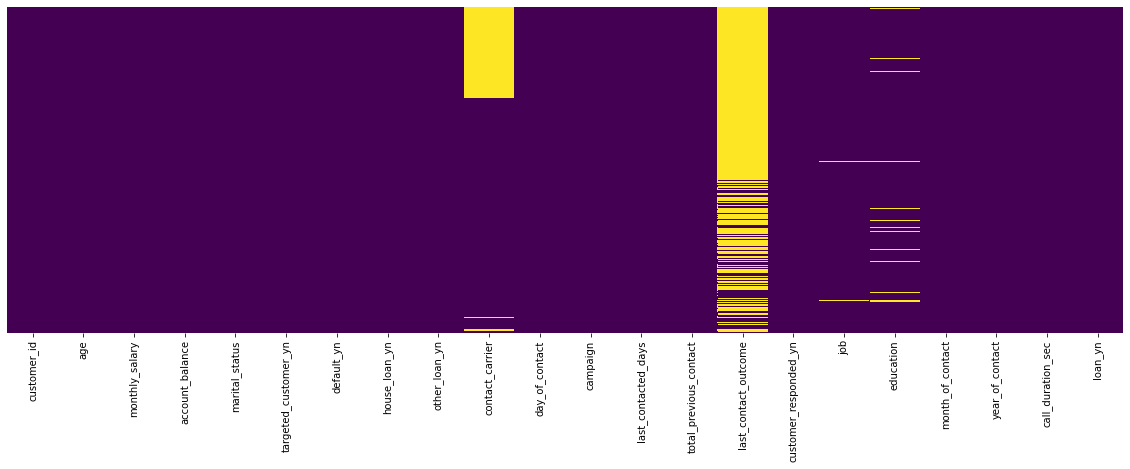

In [259]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [260]:
df['last_contact_outcome'].isnull().value_counts()

True     36959
False     8252
Name: last_contact_outcome, dtype: int64

**EDA**

last_contact_outcome column
- 81% of the data are missing
- decided to drop the column

In [261]:
df.drop(['last_contact_outcome'], inplace=True, axis=1)

In [262]:
# check the null values for columns
for column_name in df.columns:
    print(column_name, ' : ')
    print(df[column_name].isnull().value_counts())
    print('\n')

customer_id  : 
False    45211
Name: customer_id, dtype: int64


age  : 
False    45191
True        20
Name: age, dtype: int64


monthly_salary  : 
False    45211
Name: monthly_salary, dtype: int64


account_balance  : 
False    45211
Name: account_balance, dtype: int64


marital_status  : 
False    45211
Name: marital_status, dtype: int64


targeted_customer_yn  : 
False    45211
Name: targeted_customer_yn, dtype: int64


default_yn  : 
False    45211
Name: default_yn, dtype: int64


house_loan_yn  : 
False    45211
Name: house_loan_yn, dtype: int64


other_loan_yn  : 
False    45211
Name: other_loan_yn, dtype: int64


contact_carrier  : 
False    32191
True     13020
Name: contact_carrier, dtype: int64


day_of_contact  : 
False    45211
Name: day_of_contact, dtype: int64


campaign  : 
False    45211
Name: campaign, dtype: int64


last_contacted_days  : 
False    45211
Name: last_contacted_days, dtype: int64


total_previous_contact  : 
False    45211
Name: total_previous_contact, d

In [263]:
# null values containing columns: 
# age, contact_carrier, customer_responded_yn, job, education, month_of_contact, year_of_contact

<AxesSubplot:>

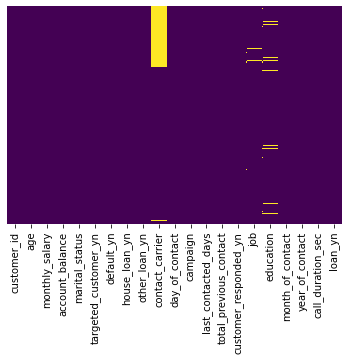

In [264]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [265]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'year_of_contact', 'call_duration_sec', 'loan_yn'],
      dtype='object')

In [266]:
# check the correlation of contact_carrier column with different columns
contact_carrier_corr = df[[ 'contact_carrier', 'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'campaign', 'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'year_of_contact', 'call_duration_sec', 'loan_yn']].corr()


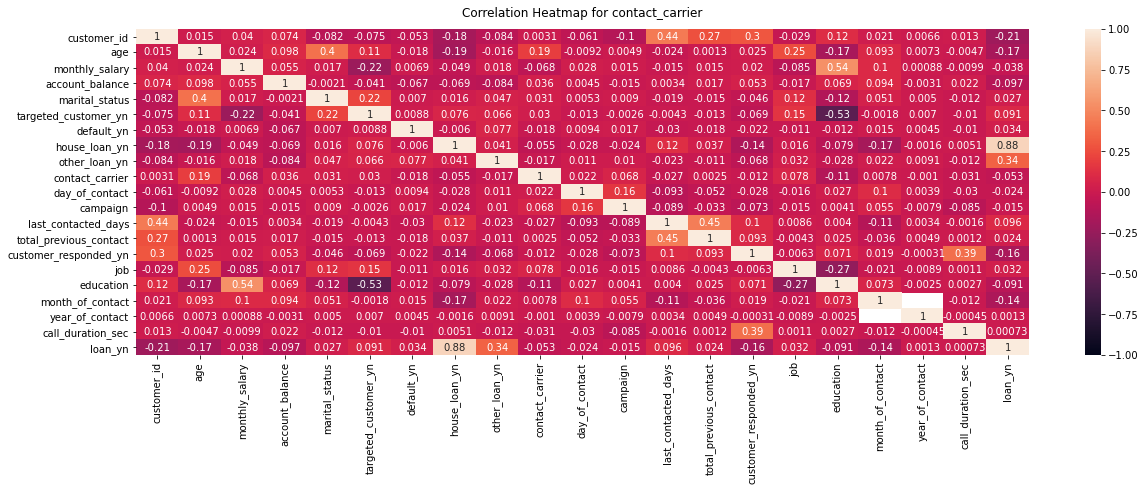

In [267]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for contact_carrier', fontdict={'fontsize':12}, pad=12);

**EDA**: **Handling Missing Values**

columns:

contact_carrier
- has a lot of missing values at the start, but after 30% of data, no missing value with exception at the last
- 19% positively correlated with age column
- 11% negatively correlated with education column
- so while handling null values for contact_carrier column, we can use education and age column for handling

customer_responded_yn
- has a small amount of missing value
- this column is 14% negatively related to house_loan_yn and 39% positively related to call_duration_sec column

job
- 25% positive correlation with age
- 12% positive correlation with marital_status
- 15% positive correlation with targeted_customer_yn
- 27% negative correlation with education

education
- 17% negative correlation with age
- 54% positive correlation with monthly_salary
- 12% negative correlation with marital_status
- 53% negative correlation with targeted_customer_yn
- 27% negative correlation with job

month_of_contact 
- 10% positive relation with monthly_salary
- 17% negative relation with house_loan_yn
- 10% positive relation with day_of_contact
- 11% negative relation with last_contacted_days
- 14% negative relation with loan_yn

year_of_contact
- it has only one value 2017. so we can drop this column

**Handle year_of_contact missing values**

customer_responded_yn
- it has only one value 2017. so we can drop this column

In [268]:
# drop year_of_contact_column. because it has only one value '2017', 
# which is not relevant to our task for finding whether the customer has taken a loan or not

df.drop(['year_of_contact'], inplace=True, axis=1)

In [269]:
# check how many values are missing for columns
print('contact_carrier : ')
display(df['contact_carrier'].isnull().value_counts())

print('\ncustomer_responded_yn : ')
display(df['customer_responded_yn'].isnull().value_counts())

print('\njob : ')
display(df['job'].isnull().value_counts())

print('\neducation : ')
display(df['education'].isnull().value_counts())

print('\nmonth_of_contact : ')
display(df['month_of_contact'].isnull().value_counts())

contact_carrier : 


False    32191
True     13020
Name: contact_carrier, dtype: int64


customer_responded_yn : 


False    45181
True        30
Name: customer_responded_yn, dtype: int64


job : 


False    44923
True       288
Name: job, dtype: int64


education : 


False    43354
True      1857
Name: education, dtype: int64


month_of_contact : 


False    45161
True        50
Name: month_of_contact, dtype: int64

**Handle customer_responded_yn missing values**

customer_responded_yn
- has a small amount of missing value: 30
- this column is 14% negatively related to house_loan_yn and 39% positively related to call_duration_sec column

In [270]:
display(df['customer_responded_yn'].unique())

df_responded_y = df[df['customer_responded_yn']==1][['customer_responded_yn', 'call_duration_sec']]
print('call duration min max seconds for yes response')
display('min:',df_responded_y['call_duration_sec'].min())
display('max:',df_responded_y['call_duration_sec'].max())
display('mean:',df_responded_y['call_duration_sec'].mean())
display('median:',df_responded_y['call_duration_sec'].median())

df_responded_n = df[df['customer_responded_yn']==0][['customer_responded_yn', 'call_duration_sec']]
print('call duration min max seconds for no response')
display('min:',df_responded_n['call_duration_sec'].min())
display('max:',df_responded_n['call_duration_sec'].max())
display('mean:',df_responded_n['call_duration_sec'].mean())
display('median:',df_responded_n['call_duration_sec'].median())

df_responded_nan = df[df['customer_responded_yn'].isnull()][['customer_responded_yn', 'call_duration_sec']]
display(df_responded_nan)

array([ 0.,  1., nan])

call duration min max seconds for yes response


'min:'

8

'max:'

3881

'mean:'

537.3610743332703

'median:'

426.0

call duration min max seconds for no response


'min:'

0

'max:'

4918

'mean:'

221.1446332781872

'median:'

164.0

customer_responded_yn  call_duration_sec
1016                     NaN                 71
2027                     NaN                173
2568                     NaN                245
2695                     NaN                209
5258                     NaN                412
8529                     NaN                192
8571                     NaN                171
9268                     NaN                295
11534                    NaN                 97
12185                    NaN                 15
17262                    NaN                126
21243                    NaN                233
21271                    NaN                 70
22002                    NaN                696
23247                    NaN                123
24253                    NaN                396
24276                    NaN                377
24300                    NaN                 38
25851                    NaN                391
26557                    NaN                895
29127                    NaN                268
32606                    NaN                664
33763                    NaN                116
37065                    NaN                628
38044                    NaN                 62
39099                    NaN                427
39504                    NaN                531
39976                    NaN                296
40397                    NaN                148
40774                    NaN                 74

In [271]:
# from above statistics we can derive that if the call duration is less then response will be no and 
# if the call duration is big then the response will be yes

def impute_customer_responded(call_duration):
    if (call_duration < 221):
        return 0
    elif (call_duration > 537):
        return 1
    else:
        if (call_duration - 221 < 537 - call_duration):
            return 0
        else:
            return 1
        
customer_response = []
for (response, call_duration) in zip(df['customer_responded_yn'], df['call_duration_sec']):
    if (pd.isnull(response)):
        customer_response.append(impute_customer_responded(call_duration))
    else:
        customer_response.append(response)
    
df['customer_responded_yn'] = customer_response
display(df['customer_responded_yn'].head(5))
display(df['customer_responded_yn'].isnull())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: customer_responded_yn, dtype: float64

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: customer_responded_yn, Length: 45211, dtype: bool

In [272]:
df['customer_responded_yn'].isnull().any()

False

**Handle missing data for month_of_contact column**

month_of_contact 
- 10% positive relation with monthly_salary
- 17% negative relation with house_loan_yn
- 10% positive relation with day_of_contact
- 11% negative relation with last_contacted_days
- 14% negative relation with loan_yn

In [273]:
df['month_of_contact'].isnull().value_counts()

False    45161
True        50
Name: month_of_contact, dtype: int64

In [274]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

In [275]:
df['month_of_contact']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
45206    11.0
45207    11.0
45208    11.0
45209    11.0
45210    11.0
Name: month_of_contact, Length: 45211, dtype: float64

In [276]:
df['month_of_contact'].head(20000).value_counts()

5.0    7943
7.0    6374
6.0    4480
8.0    1174
Name: month_of_contact, dtype: int64

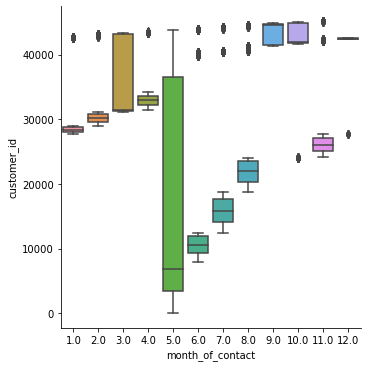

In [277]:
sns.catplot(x="month_of_contact", y="customer_id", kind="box", data=df)

In [278]:
# from the box plot we can see the values are mostly together for month_of_contact column.
# so we can impute the null value from the near by value using ffill method
df['month_of_contact'].fillna(method = 'ffill', inplace=True)

In [279]:
df['month_of_contact'].isnull().any()

False

In [280]:
df['month_of_contact'].unique()

array([ 5.,  6.,  7.,  8., 10., 11., 12.,  1.,  2.,  3.,  4.,  9.])

**Handle missing data for education column**

education
- 17% negative correlation with age
- 54% positive correlation with monthly_salary
- 12% negative correlation with marital_status
- 53% negative correlation with targeted_customer_yn
- 27% negative correlation with job

education values
1 = primary
2 = secondary
3 = tertiary

In [281]:
df['education'].isnull().value_counts()

False    43354
True      1857
Name: education, dtype: int64

<AxesSubplot:xlabel='monthly_salary', ylabel='customer_id'>

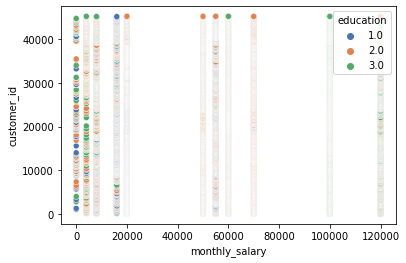

In [282]:
sns.scatterplot(data=df, x="monthly_salary", y="customer_id", hue="education", palette="deep")

<AxesSubplot:xlabel='targeted_customer_yn', ylabel='customer_id'>

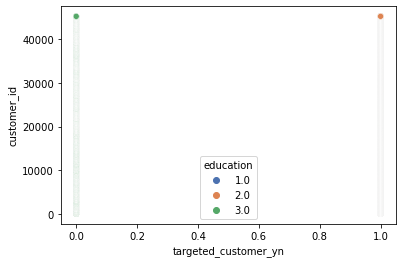

In [283]:
sns.scatterplot(data=df, x="targeted_customer_yn", y="customer_id", hue="education", palette="deep")

In [284]:
# primary education
df_edu_1 = df[df['education']==1][['education', 'monthly_salary', 'targeted_customer_yn']]
display('min:' , df_edu_1['monthly_salary'].min())
display('max:' , df_edu_1['monthly_salary'].max())
display('mean:' , df_edu_1['monthly_salary'].mean())
display('median:' , df_edu_1['monthly_salary'].median())

'min:'

0

'max:'

120000

'mean:'

34212.37775507225

'median:'

20000.0

In [285]:
# secondary education
df_edu_2 = df[df['education']==2][['education', 'monthly_salary', 'targeted_customer_yn']]
display('min:' , df_edu_2['monthly_salary'].min())
display('max:' , df_edu_2['monthly_salary'].max())
display('mean:' , df_edu_2['monthly_salary'].mean())
display('median:' , df_edu_2['monthly_salary'].median())

'min:'

0

'max:'

120000

'mean:'

49743.815188345834

'median:'

55000.0

In [286]:
#tertiary education
df_edu_3 = df[df['education']==3][['education', 'monthly_salary', 'targeted_customer_yn']]
display('min:' , df_edu_3['monthly_salary'].min())
display('max:' , df_edu_3['monthly_salary'].max())
display('mean:' , df_edu_3['monthly_salary'].mean())
display('median:' , df_edu_3['monthly_salary'].median())

'min:'

0

'max:'

120000

'mean:'

82873.61852492293

'median:'

100000.0

In [287]:
# impute value in education 
# 1 if monthly_salary is below 34212
# 2 if monthly_salary is between 34212 and 49743
# 3 if monthly_salary is above 82873

def impute_education(monthly_salary):
    if (monthly_salary < 34212):
        return 1
    elif (34212 < monthly_salary < 49743):
        if (monthly_salary - 34212 < 49743 - monthly_salary):
            return 1
        else:
            return 2
    elif (49743 < monthly_salary < 82873):
        if (monthly_salary - 49743 < 82873 - monthly_salary):
            return 2
        else:
            return 3
    else:
        return 3
        
education = []
for (edu, salary) in zip(df['education'], df['monthly_salary']):
    if (pd.isnull(edu)):
        education.append(impute_education(salary))
    else:
        education.append(edu)
    
df['education'] = education
display(df['education'].head(5))
display(df['education'].isnull().any())

0    3.0
1    2.0
2    2.0
3    1.0
4    1.0
Name: education, dtype: float64

False

**Handle missing data for job column**

job
- 25% positive correlation with age
- 12% positive correlation with marital_status
- 15% positive correlation with targeted_customer_yn
- 27% negative correlation with education

job values

1 = unemployed
2 = self-employed
3 = student
4 = entrepreneur
5 = technician
6 = management
7 = blue-collar
8 = admin
9 = services
10 = housemaid
11 = retired

In [288]:
df['job'].isnull().value_counts()

False    44923
True       288
Name: job, dtype: int64

In [289]:
display(df['age'].min())
display(df['age'].max())

18.0

95.0

<AxesSubplot:xlabel='job', ylabel='customer_id'>

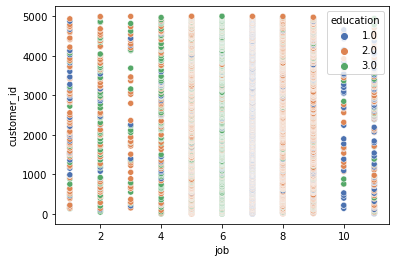

In [290]:
sns.scatterplot(data=df[:5000], x="job", y="customer_id", hue="education", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

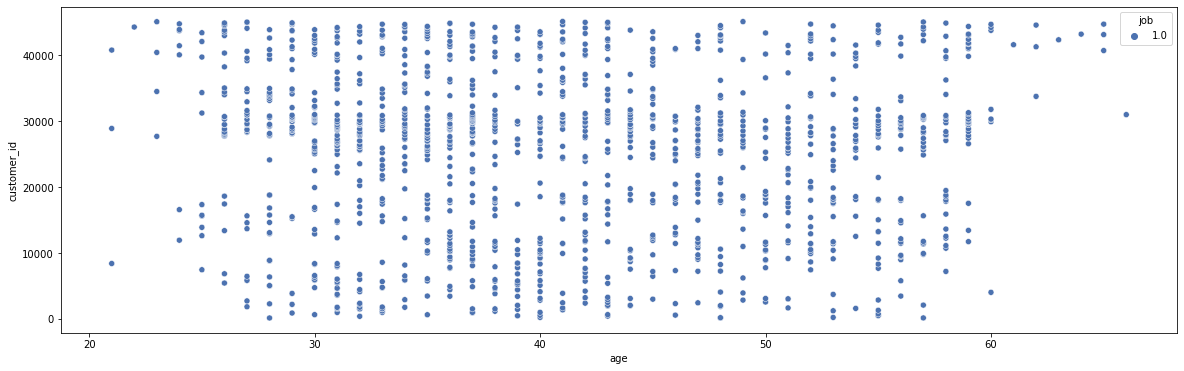

In [291]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df[df['job']==1], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

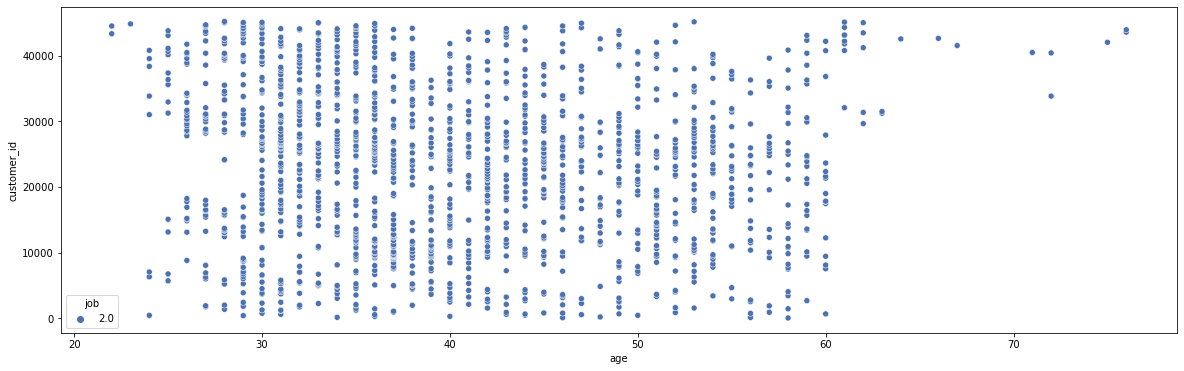

In [292]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df[df['job']==2], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

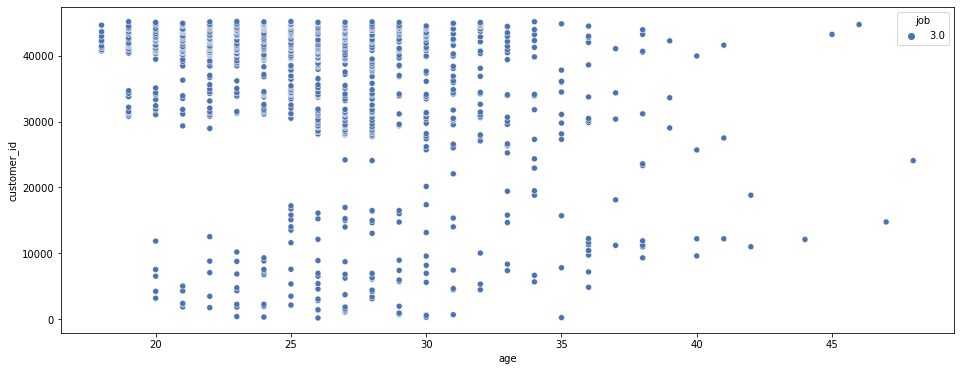

In [293]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==3], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

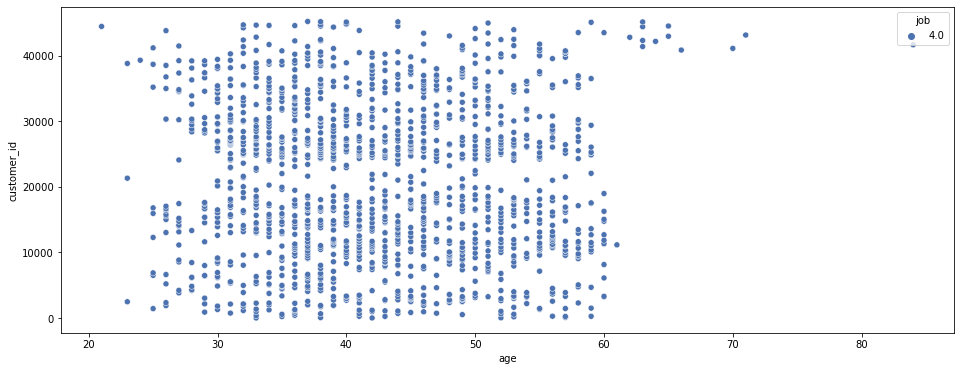

In [294]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==4], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

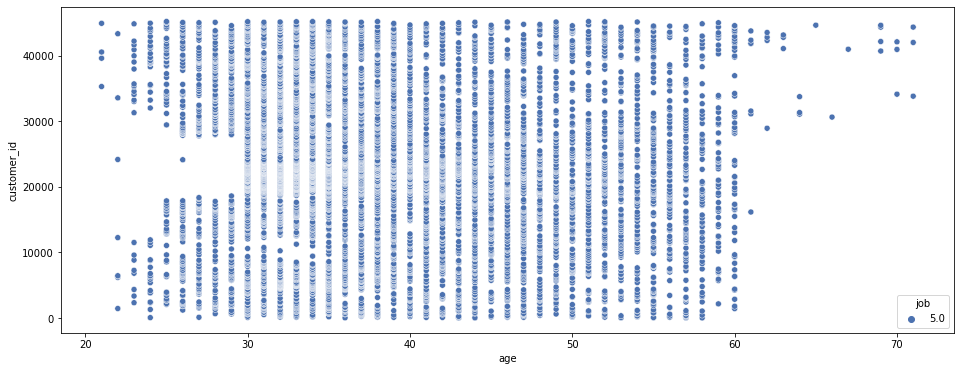

In [295]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==5], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

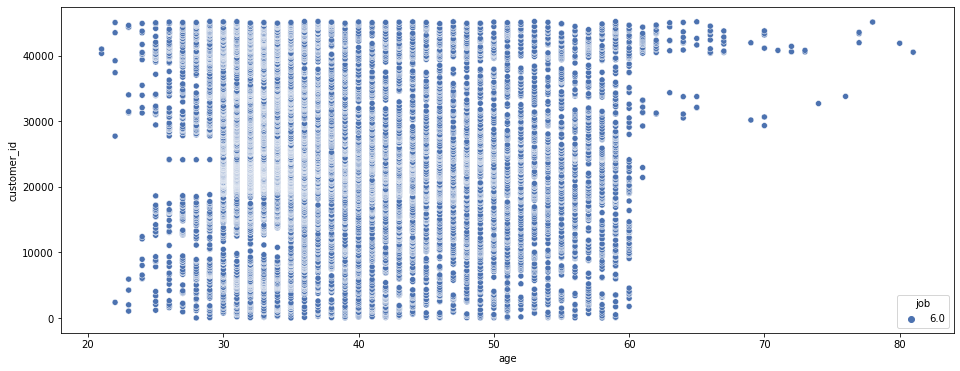

In [296]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==6], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

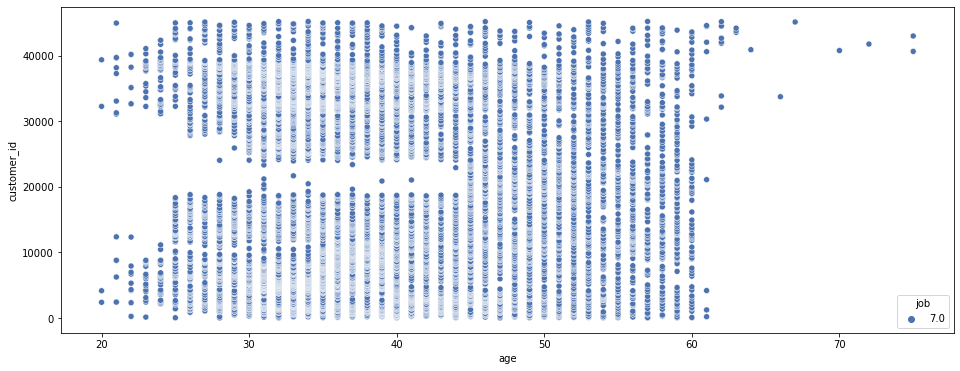

In [297]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==7], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

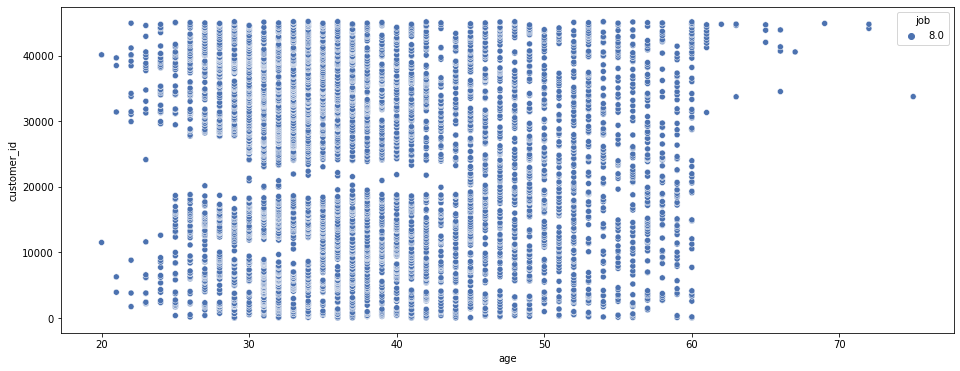

In [298]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==8], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

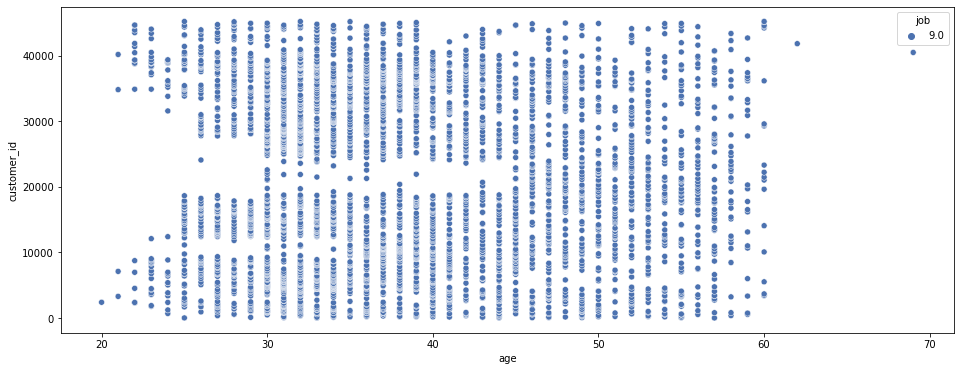

In [299]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==9], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

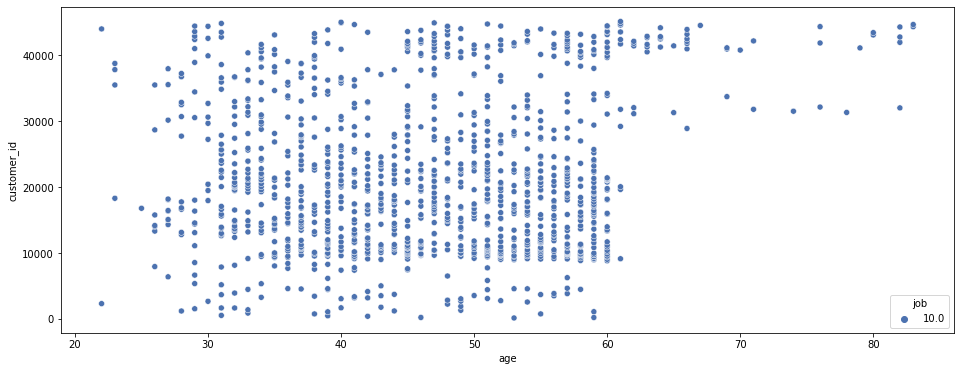

In [300]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==10], x="age", y="customer_id", hue="job", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

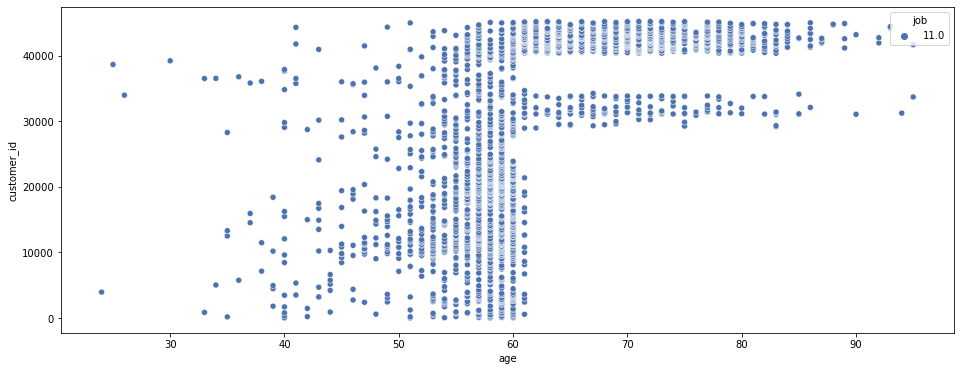

In [301]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['job']==11], x="age", y="customer_id", hue="job", palette="deep")

In [302]:
# the information derived from job vs age data is below
# 1 = unemployed      25 to 60
# 2 = self-employed   20 to 60
# 3 = student         18 to 40
# 4 = entrepreneur    25 to 60
# 5 = technician      20 to 60
# 6 = management      25 to 60
# 7 = blue-collar     20 to 60
# 8 = admin           20 to 60
# 9 = services        20 to 60
# 10 = housemaid      25 to 60
# 11 = retired        40 to 90

# From above data there is not any pettern shown in between age vs job. 
# so deciding to drop rows with null values having in job column

df.dropna(subset=['job'], axis=0, inplace=True)
df['job'].isnull().value_counts()

False    44923
Name: job, dtype: int64

In [303]:
df.reset_index(inplace = True)
df

index  customer_id   age  monthly_salary  account_balance  \
0          0            1  58.0          100000             2143   
1          1            2  44.0           60000               29   
2          2            3  33.0          120000                2   
3          3            4  47.0           20000             1506   
4          5            6  35.0          100000              231   
...      ...          ...   ...             ...              ...   
44918  45206        45207  51.0           60000              825   
44919  45207        45208  71.0           55000             1729   
44920  45208        45209  72.0           55000             5715   
44921  45209        45210  57.0           20000              668   
44922  45210        45211  37.0          120000             2971   

       marital_status  targeted_customer_yn  default_yn  house_loan_yn  \
0                   2                     1           0              1   
1                   1                     1           0              1   
2                   2                     1           0              1   
3                   2                     0           0              1   
4                   2                     1           0              1   
...               ...                   ...         ...            ...   
44918               2                     1           0              0   
44919               3                     1           0              0   
44920               2                     1           0              0   
44921               2                     1           0              0   
44922               2                     1           0              0   

       other_loan_yn  ...  day_of_contact  campaign  last_contacted_days  \
0                  0  ...               5         1                   -1   
1                  0  ...               5         1                   -1   
2                  1  ...               5         1                   -1   
3                  0  ...               5         1                   -1   
4                  0  ...               5         1                   -1   
...              ...  ...             ...       ...                  ...   
44918              0  ...              17         3                   -1   
44919              0  ...              17         2                   -1   
44920              0  ...              17         5                  184   
44921              0  ...              17         4                   -1   
44922              0  ...              17         2                  188   

       total_previous_contact  customer_responded_yn   job  education  \
0                           0                    0.0   6.0        3.0   
1                           0                    0.0   5.0        2.0   
2                           0                    0.0   4.0        2.0   
3                           0                    0.0   7.0        1.0   
4                           0                    0.0   6.0        3.0   
...                       ...                    ...   ...        ...   
44918                       0                    1.0   5.0        3.0   
44919                       0                    1.0  11.0        1.0   
44920                       3                    1.0  11.0        2.0   
44921                       0                    0.0   7.0        2.0   
44922                      11                    0.0   4.0        2.0   

       month_of_contact  call_duration_sec  loan_yn  
0                   5.0                261        1  
1                   5.0                151        1  
2                   5.0                 76        1  
3                   5.0                 92        1  
4                   5.0                139        1  
...                 ...                ...      ...  
44918              11.0                977        0  
44919              11.0                456        0  
44920              11.0  

In [304]:
df.drop(['index'], axis=1, inplace=True)

In [305]:
df

customer_id   age  monthly_salary  account_balance  marital_status  \
0                1  58.0          100000             2143               2   
1                2  44.0           60000               29               1   
2                3  33.0          120000                2               2   
3                4  47.0           20000             1506               2   
4                6  35.0          100000              231               2   
...            ...   ...             ...              ...             ...   
44918        45207  51.0           60000              825               2   
44919        45208  71.0           55000             1729               3   
44920        45209  72.0           55000             5715               2   
44921        45210  57.0           20000              668               2   
44922        45211  37.0          120000             2971               2   

       targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
0                         1           0              1              0   
1                         1           0              1              0   
2                         1           0              1              1   
3                         0           0              1              0   
4                         1           0              1              0   
...                     ...         ...            ...            ...   
44918                     1           0              0              0   
44919                     1           0              0              0   
44920                     1           0              0              0   
44921                     1           0              0              0   
44922                     1           0              0              0   

       contact_carrier  day_of_contact  campaign  last_contacted_days  \
0                  NaN               5         1                   -1   
1                  NaN               5         1                   -1   
2                  NaN               5         1                   -1   
3                  NaN               5         1                   -1   
4                  NaN               5         1                   -1   
...                ...             ...       ...                  ...   
44918              1.0              17         3                   -1   
44919              1.0              17         2                   -1   
44920              1.0              17         5                  184   
44921              2.0              17         4                   -1   
44922              1.0              17         2                  188   

       total_previous_contact  customer_responded_yn   job  education  \
0                           0                    0.0   6.0        3.0   
1                           0                    0.0   5.0        2.0   
2                           0                    0.0   4.0        2.0   
3                           0                    0.0   7.0        1.0   
4                           0                    0.0   6.0        3.0   
...                       ...                    ...   ...        ...   
44918                       0                    1.0   5.0        3.0   
44919                       0                    1.0  11.0        1.0   
44920                       3                    1.0  11.0        2.0   
44921                       0                    0.0   7.0        2.0   
44922                      11                    0.0   4.0        2.0   

       month_of_contact  call_duration_sec  loan_yn  
0                   5.0                261        1  
1                   5.0                151        1  
2                   5.0                 76        1  
3                   5.0                 92        1  
4                   5.0                139        1  
...                 ...                ...      ...  
44918              11.0                977        0  
44919              

In [306]:
# find out remaining columns which has missing values
display('age', df['age'].isnull().any())
display('monthly_salary', df['monthly_salary'].isnull().any())
display('account_balance', df['account_balance'].isnull().any())
display('marital_status', df['marital_status'].isnull().any())
display('targeted_customer_yn', df['targeted_customer_yn'].isnull().any())
display('default_yn', df['default_yn'].isnull().any())
display('house_loan_yn', df['house_loan_yn'].isnull().any())
display('other_loan_yn', df['other_loan_yn'].isnull().any())
display('contact_carrier', df['contact_carrier'].isnull().any())
display('day_of_contact', df['day_of_contact'].isnull().any())
display('campaign', df['campaign'].isnull().any())
display('last_contacted_days', df['last_contacted_days'].isnull().any())
display('total_previous_contact', df['total_previous_contact'].isnull().any())
display('customer_responded_yn', df['customer_responded_yn'].isnull().any())
display('job', df['job'].isnull().any())
display('education', df['education'].isnull().any())
display('month_of_contact', df['month_of_contact'].isnull().any())
display('call_duration_sec', df['call_duration_sec'].isnull().any())
display('loan_yn', df['loan_yn'].isnull().any())

# only 2 column has a missing values: age and contact_carrier

'age'

True

'monthly_salary'

False

'account_balance'

False

'marital_status'

False

'targeted_customer_yn'

False

'default_yn'

False

'house_loan_yn'

False

'other_loan_yn'

False

'contact_carrier'

True

'day_of_contact'

False

'campaign'

False

'last_contacted_days'

False

'total_previous_contact'

False

'customer_responded_yn'

False

'job'

False

'education'

False

'month_of_contact'

False

'call_duration_sec'

False

'loan_yn'

False

**Handle missing data for age column**

age
- 40% positively correlated with marital_status column
- 25% positively correlated with job column

In [307]:
df['age'].isnull().value_counts()

False    44903
True        20
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='customer_id'>

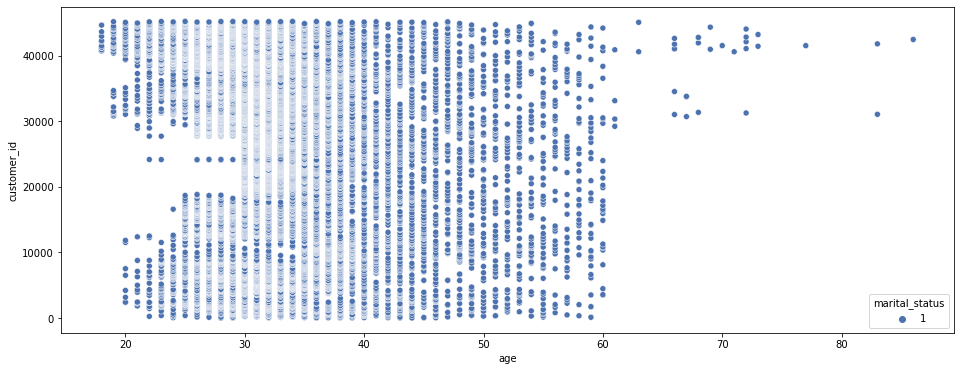

In [308]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['marital_status']==1], x="age", y="customer_id", hue="marital_status", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

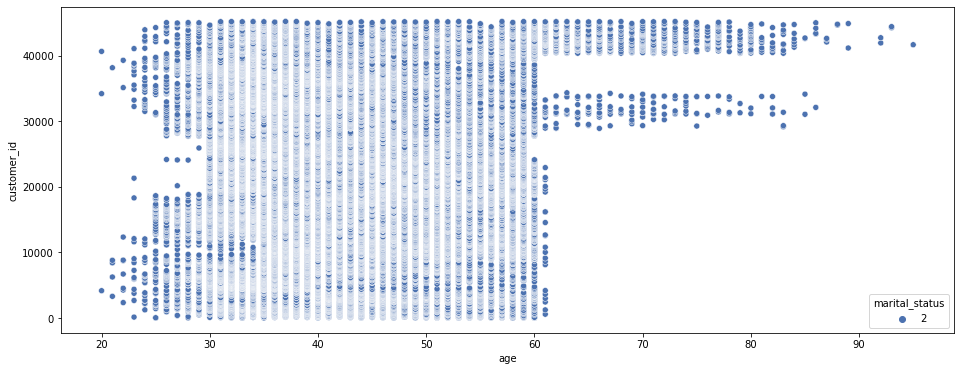

In [309]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['marital_status']==2], x="age", y="customer_id", hue="marital_status", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

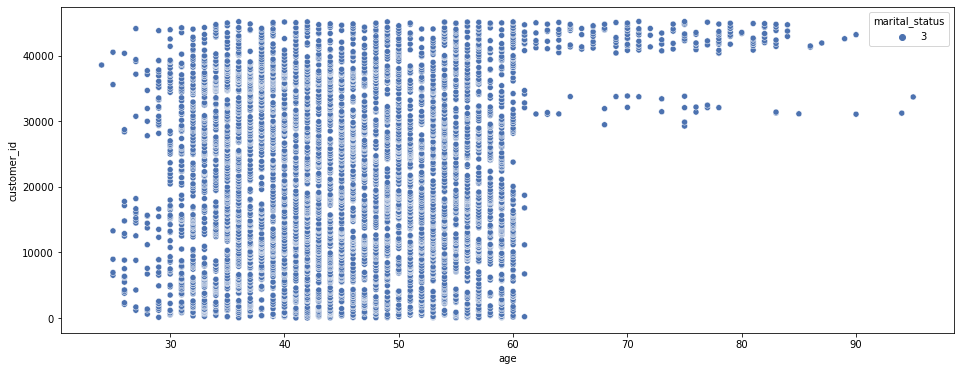

In [310]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['marital_status']==3], x="age", y="customer_id", hue="marital_status", palette="deep")

In [311]:
# there is no clear distinction between marital_status vs age.
# so deciding to drop 20 rows, beacuse 20 records won't affect this large dataset
df.dropna(subset=['age'], axis=0, inplace=True)
display(df['age'].isnull().value_counts())

df.reset_index(inplace = True, drop = True)
display(df)

False    44903
Name: age, dtype: int64

customer_id   age  monthly_salary  account_balance  marital_status  \
0                1  58.0          100000             2143               2   
1                2  44.0           60000               29               1   
2                3  33.0          120000                2               2   
3                4  47.0           20000             1506               2   
4                6  35.0          100000              231               2   
...            ...   ...             ...              ...             ...   
44898        45207  51.0           60000              825               2   
44899        45208  71.0           55000             1729               3   
44900        45209  72.0           55000             5715               2   
44901        45210  57.0           20000              668               2   
44902        45211  37.0          120000             2971               2   

       targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
0                         1           0              1              0   
1                         1           0              1              0   
2                         1           0              1              1   
3                         0           0              1              0   
4                         1           0              1              0   
...                     ...         ...            ...            ...   
44898                     1           0              0              0   
44899                     1           0              0              0   
44900                     1           0              0              0   
44901                     1           0              0              0   
44902                     1           0              0              0   

       contact_carrier  day_of_contact  campaign  last_contacted_days  \
0                  NaN               5         1                   -1   
1                  NaN               5         1                   -1   
2                  NaN               5         1                   -1   
3                  NaN               5         1                   -1   
4                  NaN               5         1                   -1   
...                ...             ...       ...                  ...   
44898              1.0              17         3                   -1   
44899              1.0              17         2                   -1   
44900              1.0              17         5                  184   
44901              2.0              17         4                   -1   
44902              1.0              17         2                  188   

       total_previous_contact  customer_responded_yn   job  education  \
0                           0                    0.0   6.0        3.0   
1                           0                    0.0   5.0        2.0   
2                           0                    0.0   4.0        2.0   
3                           0                    0.0   7.0        1.0   
4                           0                    0.0   6.0        3.0   
...                       ...                    ...   ...        ...   
44898                       0                    1.0   5.0        3.0   
44899                       0                    1.0  11.0        1.0   
44900                       3                    1.0  11.0        2.0   
44901                       0                    0.0   7.0        2.0   
44902                      11                    0.0   4.0        2.0   

       month_of_contact  call_duration_sec  loan_yn  
0                   5.0                261        1  
1                   5.0                151        1  
2                   5.0                 76        1  
3                   5.0                 92        1  
4                   5.0                139        1  
...                 ...                ...      ...  
44898              11.0                977        0  
44899              

**Handle missing data for contact_carrier column**

contact_carrier
- has a lot of missing values at the start, but after 30% of data, no missing value with exception at the last
- 19% positively correlated with age column
- 11% negatively correlated with education column
- so while handling null values for contact_carrier column, we can use education and age column for handling

contact_carrier values

1 = cellular
2 = telephone

In [312]:
df['contact_carrier'].isnull().value_counts()

False    32002
True     12901
Name: contact_carrier, dtype: int64

<AxesSubplot:>

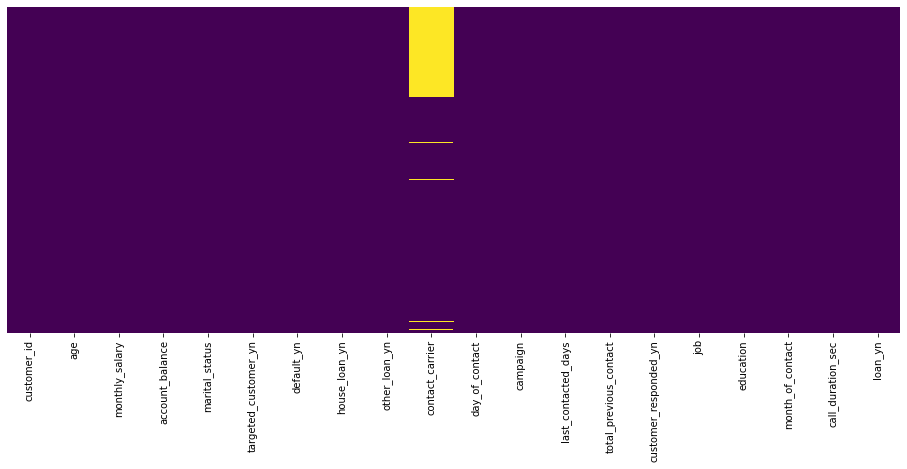

In [313]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='age', ylabel='customer_id'>

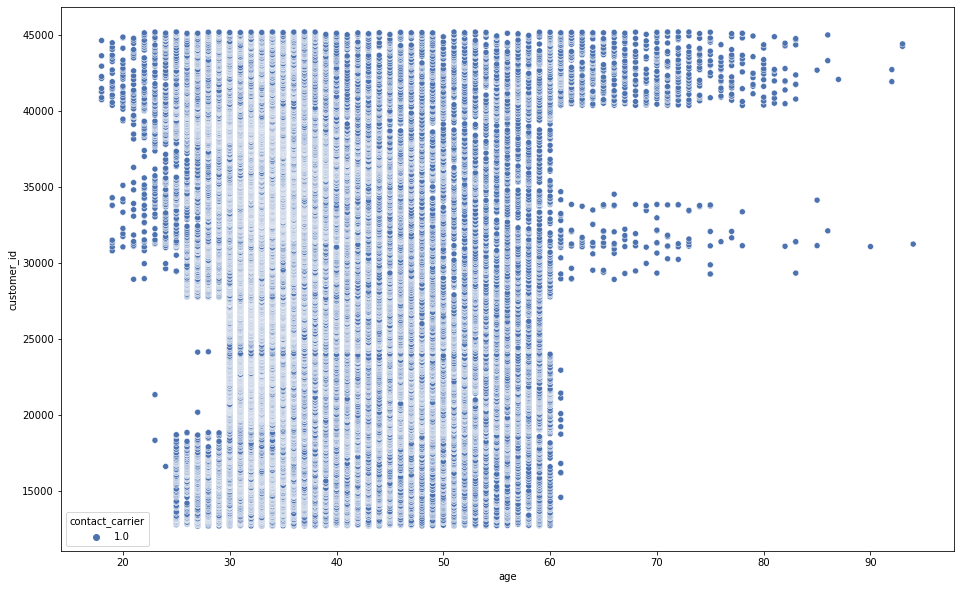

In [314]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df[df['contact_carrier']==1], x="age", y="customer_id", hue="contact_carrier", palette="deep")

<AxesSubplot:xlabel='age', ylabel='customer_id'>

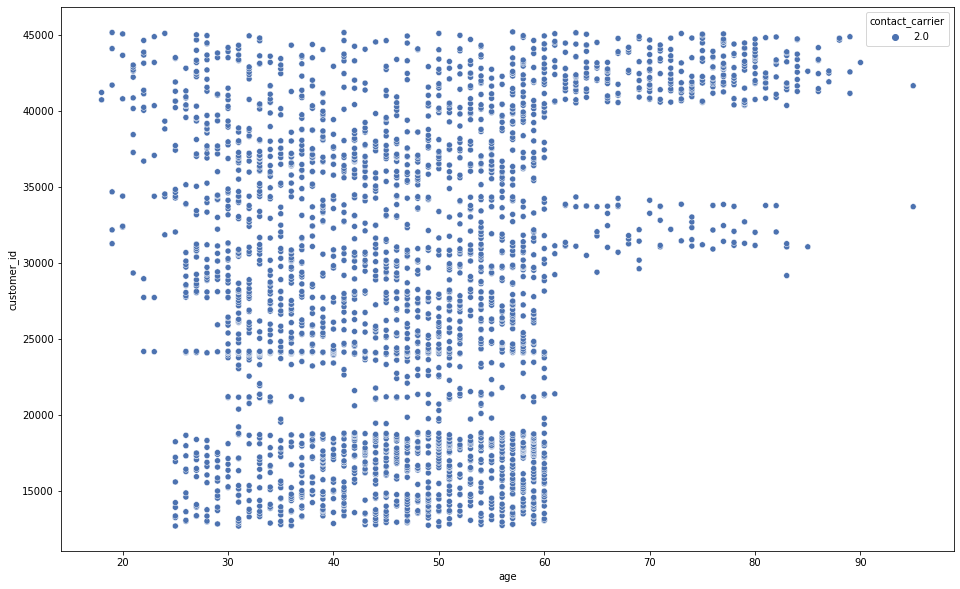

In [315]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df[df['contact_carrier']==2], x="age", y="customer_id", hue="contact_carrier", palette="deep")

In [316]:
print('cellular: ', df[df['contact_carrier']==1]['age'].count())
print('telephone: ', df[df['contact_carrier']==2]['age'].count())

cellular:  29142
telephone:  2860


**EDA:**

every 10 cellular call there is only 1 telephone call from the statistics.
No observation derived from scatter plot, because calls are made randomly regardless of specific carrier 
impute 10 celluar and 1 telephone data for every 11 null values

In [317]:
impute_data = [1]*10  # 1 for cellular
impute_data.append(2) # 2 for telephone
impute_data

i = 0
def impute_contact_carrier(con_val):
    global i
    if(i > 10): 
        i=0
        
    if(pd.isnull(con_val)):
        con_val = impute_data[i]
        i += 1
    
    return con_val
    
df['contact_carrier'] = df['contact_carrier'].apply(impute_contact_carrier)
df['contact_carrier'].unique()

array([1., 2.])

**All the missing values are handled. Now check the correlation again to see changes**

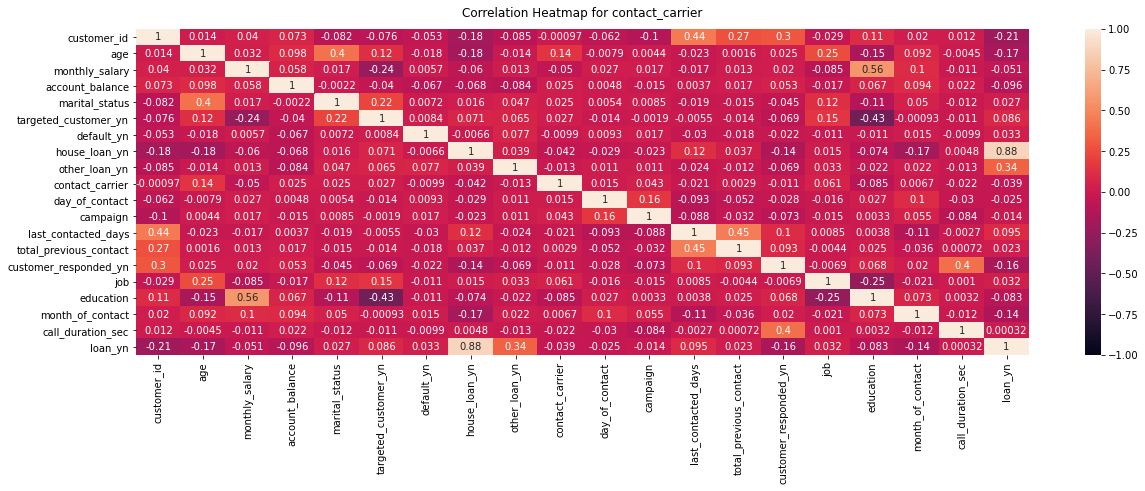

In [318]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for contact_carrier', fontdict={'fontsize':12}, pad=12);

In [319]:
df.isnull().any()

customer_id               False
age                       False
monthly_salary            False
account_balance           False
marital_status            False
targeted_customer_yn      False
default_yn                False
house_loan_yn             False
other_loan_yn             False
contact_carrier           False
day_of_contact            False
campaign                  False
last_contacted_days       False
total_previous_contact    False
customer_responded_yn     False
job                       False
education                 False
month_of_contact          False
call_duration_sec         False
loan_yn                   False
dtype: bool

In [320]:
# as we can see that correlation does not changed a little bit for contact_carrier column, except the correlation is almost same.
# so it proves that we handled missing values correctly.

df

customer_id   age  monthly_salary  account_balance  marital_status  \
0                1  58.0          100000             2143               2   
1                2  44.0           60000               29               1   
2                3  33.0          120000                2               2   
3                4  47.0           20000             1506               2   
4                6  35.0          100000              231               2   
...            ...   ...             ...              ...             ...   
44898        45207  51.0           60000              825               2   
44899        45208  71.0           55000             1729               3   
44900        45209  72.0           55000             5715               2   
44901        45210  57.0           20000              668               2   
44902        45211  37.0          120000             2971               2   

       targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
0                         1           0              1              0   
1                         1           0              1              0   
2                         1           0              1              1   
3                         0           0              1              0   
4                         1           0              1              0   
...                     ...         ...            ...            ...   
44898                     1           0              0              0   
44899                     1           0              0              0   
44900                     1           0              0              0   
44901                     1           0              0              0   
44902                     1           0              0              0   

       contact_carrier  day_of_contact  campaign  last_contacted_days  \
0                  1.0               5         1                   -1   
1                  1.0               5         1                   -1   
2                  1.0               5         1                   -1   
3                  1.0               5         1                   -1   
4                  1.0               5         1                   -1   
...                ...             ...       ...                  ...   
44898              1.0              17         3                   -1   
44899              1.0              17         2                   -1   
44900              1.0              17         5                  184   
44901              2.0              17         4                   -1   
44902              1.0              17         2                  188   

       total_previous_contact  customer_responded_yn   job  education  \
0                           0                    0.0   6.0        3.0   
1                           0                    0.0   5.0        2.0   
2                           0                    0.0   4.0        2.0   
3                           0                    0.0   7.0        1.0   
4                           0                    0.0   6.0        3.0   
...                       ...                    ...   ...        ...   
44898                       0                    1.0   5.0        3.0   
44899                       0                    1.0  11.0        1.0   
44900                       3                    1.0  11.0        2.0   
44901                       0                    0.0   7.0        2.0   
44902                      11                    0.0   4.0        2.0   

       month_of_contact  call_duration_sec  loan_yn  
0                   5.0                261        1  
1                   5.0                151        1  
2                   5.0                 76        1  
3                   5.0                 92        1  
4                   5.0                139        1  
...                 ...                ...      ...  
44898              11.0                977        0  
44899              

## Outlier Handling

**Age column**

In [321]:
display('min', df['age'].min())
display('max', df['age'].max())

'min'

18.0

'max'

95.0

<AxesSubplot:xlabel='age', ylabel='customer_id'>

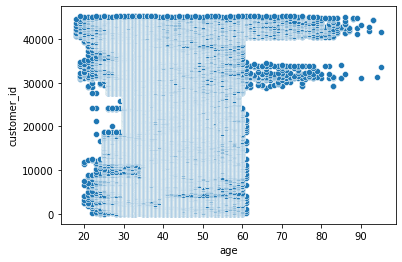

In [322]:
sns.scatterplot(data=df, x="age", y="customer_id", palette="deep")

**Monthly salary column**

In [323]:
display('min', df['monthly_salary'].min())
display('max', df['monthly_salary'].max())

'min'

4000

'max'

120000

**Account balance column**

In [324]:
display('min', df['account_balance'].min())
display('max', df['account_balance'].max())

'min'

-8019

'max'

102127

<AxesSubplot:xlabel='account_balance', ylabel='customer_id'>

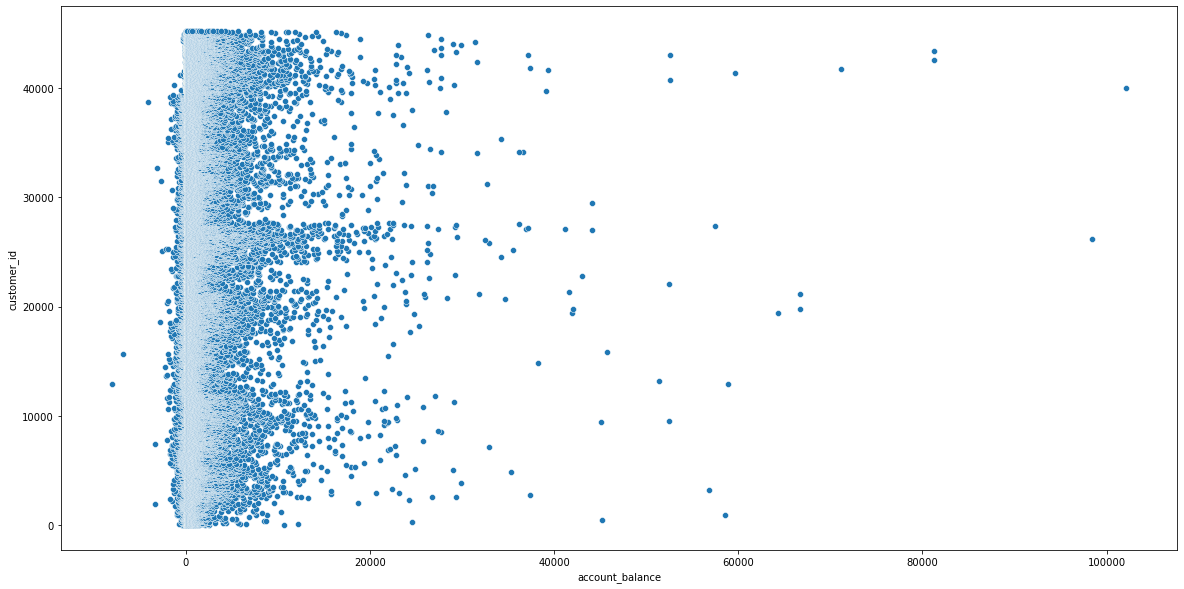

In [325]:
# looks like there some outlier in account_balance column, because account balance can not be -8019
# lets use the scatter plot to see all the outlier in account balance column

plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="account_balance", y="customer_id", palette="deep")

In [326]:
df.nsmallest(10, 'account_balance')

customer_id   age  monthly_salary  account_balance  marital_status  \
12790        12910  26.0           20000            -8019               1   
15554        15683  49.0          100000            -6847               2   
38491        38737  60.0          100000            -4057               3   
7385          7414  43.0          100000            -3372               2   
1887          1897  57.0           60000            -3313               2   
32476        32714  39.0           60000            -3058               2   
18433        18574  40.0           60000            -2827               2   
31274        31510  52.0          100000            -2712               2   
24916        25120  49.0           20000            -2604               1   
14308        14435  51.0          100000            -2282               3   

       targeted_customer_yn  default_yn  house_loan_yn  other_loan_yn  \
12790                     1           1              0              1   
15554                     1           1              0              1   
38491                     0           0              1              0   
7385                      1           1              1              0   
1887                      1           1              1              1   
32476                     1           0              1              1   
18433                     1           1              1              1   
31274                     1           0              1              1   
24916                     1           1              1              0   
14308                     0           0              1              1   

       contact_carrier  day_of_contact  campaign  last_contacted_days  \
12790              1.0               7         3                   -1   
15554              1.0              21         1                   -1   
38491              1.0              18         6                   -1   
7385               1.0              29         2                   -1   
1887               1.0               9         1                   -1   
32476              1.0              17         3                   -1   
18433              1.0              31         1                   -1   
31274              1.0               2         1                   -1   
24916              1.0              18         1                   -1   
14308              1.0              14         6                   -1   

       total_previous_contact  customer_responded_yn  job  education  \
12790                       0                    0.0  7.0        2.0   
15554                       0                    0.0  6.0        3.0   
38491                       0                    0.0  6.0        3.0   
7385                        0                    0.0  6.0        3.0   
1887                        0                    0.0  2.0        3.0   
32476                       0                    1.0  2.0        3.0   
18433                       0                    0.0  5.0        3.0   
31274                       0                    0.0  6.0        3.0   
24916                       0                    0.0  7.0        1.0   
14308                       0                    0.0  6.0        3.0   

       month_of_contact  call_duration_sec  loan_yn  
12790               7.0                299        1  
15554               7.0                206        1  
38491               5.0                242        1  
7385                5.0                386        1  
1887                5.0                153        1  
32476               4.0                882        1  
18433               7.0                843        1  
31274               4.0                253        1  
24916              11.0                142        1  
14308               7.0                301        1

In [327]:
# By analysis found out that account balance can be negative. so -8019 is not an outlier

**Last contacted days column**

In [328]:
display('min', df['last_contacted_days'].min())
display('max', df['last_contacted_days'].max())

'min'

-1

'max'

871

<AxesSubplot:xlabel='last_contacted_days', ylabel='customer_id'>

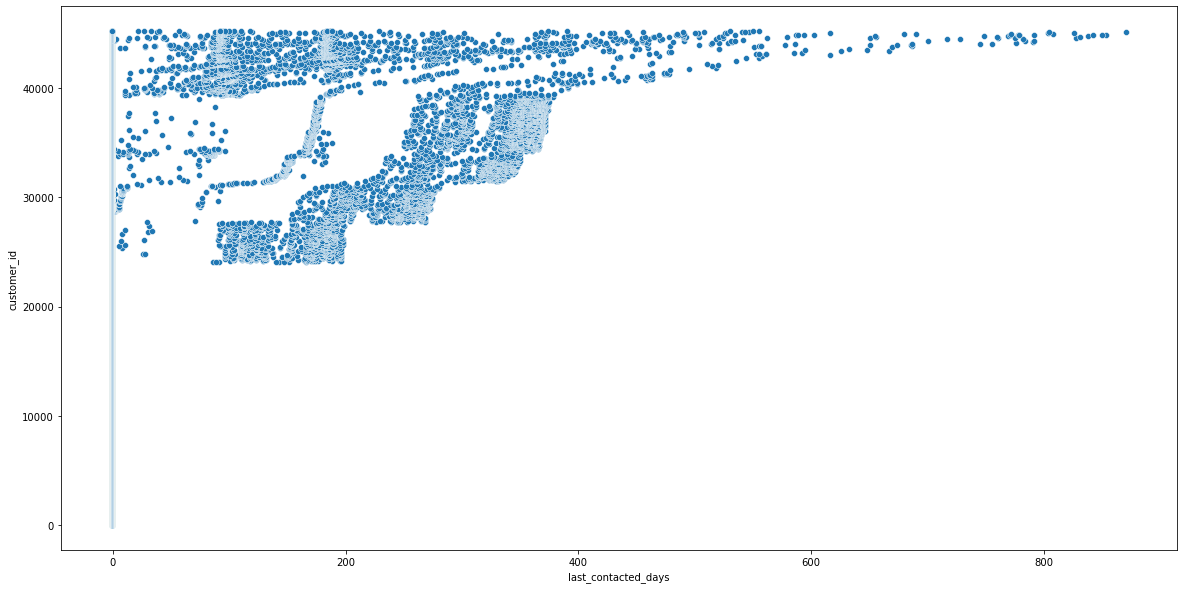

In [329]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="last_contacted_days", y="customer_id", palette="deep")

# looks like there is no outlier in last_contacted_days column

**total previous contact column**

In [330]:
display('min', df['total_previous_contact'].min())
display('max', df['total_previous_contact'].max())

'min'

0

'max'

275

<AxesSubplot:xlabel='total_previous_contact', ylabel='customer_id'>

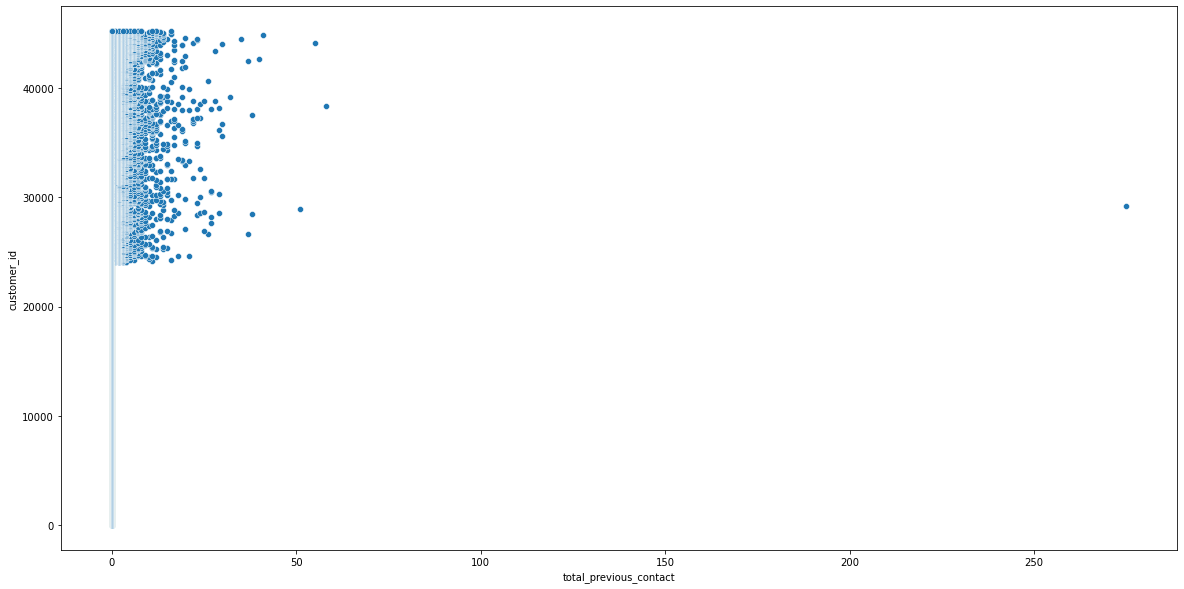

In [331]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="total_previous_contact", y="customer_id", palette="deep")

In [332]:
df[['customer_id','total_previous_contact']].nlargest(5, 'total_previous_contact')

customer_id  total_previous_contact
28960        29183                     275
38081        38327                      58
43795        44090                      55
28664        28887                      51
44518        44823                      41

In [333]:
# looks like there is 1 outlier which has 275 values. apart from that all the values lies between 0 to 58
# so replace that value with mean
mean_value = df['total_previous_contact'].mean()

df['total_previous_contact'] = df['total_previous_contact'].apply(lambda x: round(mean_value) if (x==275) else x)
df[['customer_id','total_previous_contact']].nlargest(5, 'total_previous_contact')

customer_id  total_previous_contact
38081        38327                      58
43795        44090                      55
28664        28887                      51
44518        44823                      41
42330        42612                      40

<AxesSubplot:xlabel='total_previous_contact', ylabel='customer_id'>

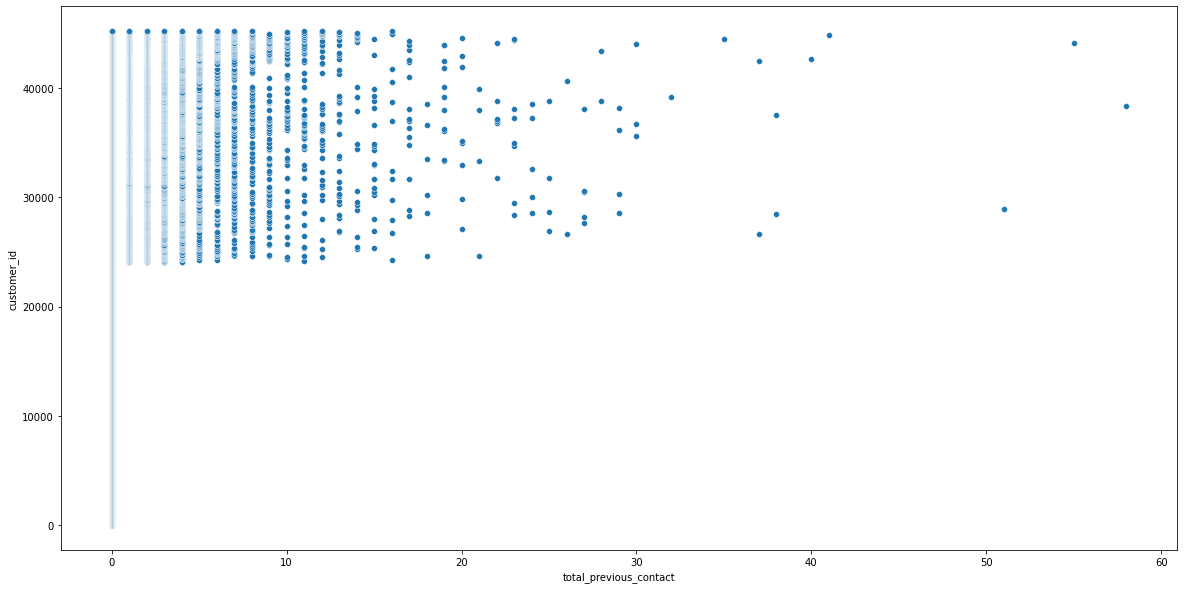

In [334]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="total_previous_contact", y="customer_id", palette="deep")

**Call duration sec column**

In [335]:
display('min', df['call_duration_sec'].min())
display('max', df['call_duration_sec'].max())

'min'

0

'max'

4918

<AxesSubplot:xlabel='call_duration_sec'>

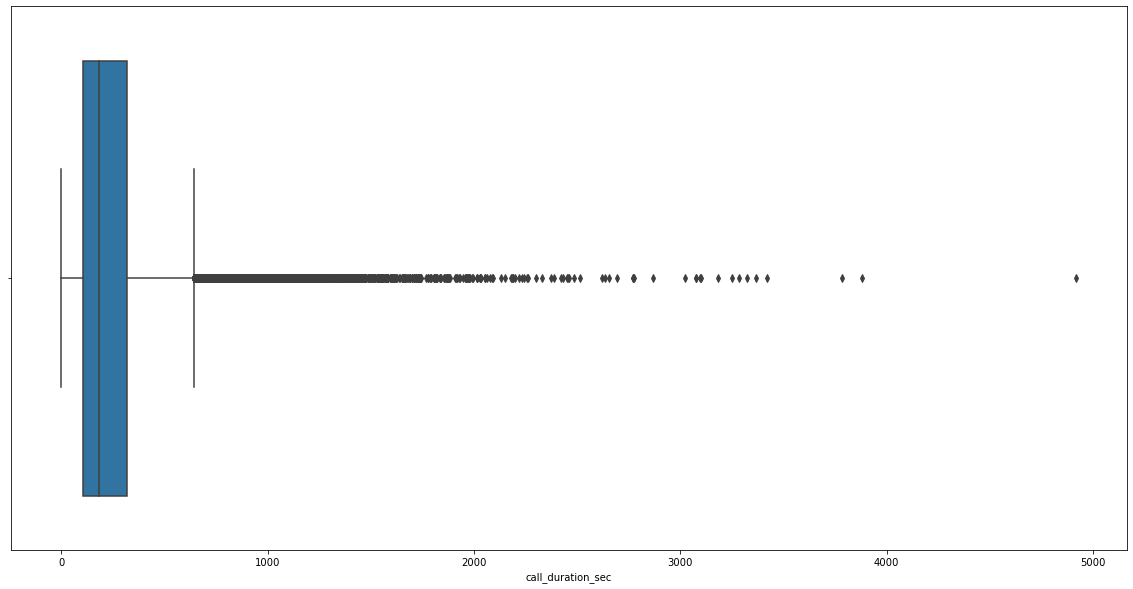

In [336]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df["call_duration_sec"])

In [337]:
df[['customer_id','call_duration_sec']].nlargest(5, 'call_duration_sec')

customer_id  call_duration_sec
23948        24149               4918
9886          9948               3881
44303        44603               3785
19480        19640               3422
2376          2387               3366

In [338]:
# call duration seconds 4918, 3881 and 3785 looks outlier in the data. so replacing with mean value
mean_value = df['call_duration_sec'].mean()

df['call_duration_sec'] = df['call_duration_sec'].apply(lambda x: round(mean_value) if (x>=3700) else x)
df[['customer_id','call_duration_sec']].nlargest(5, 'call_duration_sec')

customer_id  call_duration_sec
19480        19640               3422
2376          2387               3366
20940        21114               3322
23895        24096               3284
23845        24045               3253

In [339]:
# convert all the float data into integer
df['age'] = df['age'].apply(np.int64)
df['contact_carrier'] = df['contact_carrier'].apply(np.int64)
df['customer_responded_yn'] = df['customer_responded_yn'].apply(np.int64)
df['job'] = df['job'].apply(np.int64)
df['education'] = df['education'].apply(np.int64)
df['month_of_contact'] = df['month_of_contact'].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44903 entries, 0 to 44902
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   customer_id             44903 non-null  int64
 1   age                     44903 non-null  int64
 2   monthly_salary          44903 non-null  int64
 3   account_balance         44903 non-null  int64
 4   marital_status          44903 non-null  int64
 5   targeted_customer_yn    44903 non-null  int64
 6   default_yn              44903 non-null  int64
 7   house_loan_yn           44903 non-null  int64
 8   other_loan_yn           44903 non-null  int64
 9   contact_carrier         44903 non-null  int64
 10  day_of_contact          44903 non-null  int64
 11  campaign                44903 non-null  int64
 12  last_contacted_days     44903 non-null  int64
 13  total_previous_contact  44903 non-null  int64
 14  customer_responded_yn   44903 non-null  int64
 15  job                

# Exploratory Data Analysis

**Measure central tendency of each feature**

In [340]:
df.describe()

customer_id           age  monthly_salary  account_balance  \
count  44903.000000  44903.000000    44903.000000     44903.000000   
mean   22613.030020     40.892947    57371.601007      1359.803332   
std    13051.942037     10.604829    31859.453820      3045.448628   
min        1.000000     18.000000     4000.000000     -8019.000000   
25%    11313.500000     33.000000    20000.000000        72.000000   
50%    22640.000000     39.000000    60000.000000       447.000000   
75%    33917.500000     48.000000    70000.000000      1421.000000   
max    45211.000000     95.000000   120000.000000    102127.000000   

       marital_status  targeted_customer_yn    default_yn  house_loan_yn  \
count    44903.000000          44903.000000  44903.000000   44903.000000   
mean         1.832216              0.822395      0.018083       0.558782   
std          0.608719              0.382184      0.133255       0.496538   
min          1.000000              0.000000      0.000000       0.000000   
25%          1.000000              1.000000      0.000000       0.000000   
50%          2.000000              1.000000      0.000000       1.000000   
75%          2.000000              1.000000      0.000000       1.000000   
max          3.000000              1.000000      1.000000       1.000000   

       other_loan_yn  contact_carrier  day_of_contact      campaign  \
count   44903.000000     44903.000000    44903.000000  44903.000000   
mean        0.161036         1.089794       15.813754      2.760350   
std         0.367568         0.285889        8.319873      3.093225   
min         0.000000         1.000000        1.000000      1.000000   
25%         0.000000         1.000000        8.000000      1.000000   
50%         0.000000         1.000000       16.000000      2.000000   
75%         0.000000         1.000000       21.000000      3.000000   
max         1.000000         2.000000       31.000000     63.000000   

       last_contacted_days  total_previous_contact  customer_responded_yn  \
count         44903.000000            44903.000000           44903.000000   
mean             40.304389                0.575552               0.117141   
std             100.200294                1.911215               0.321592   
min              -1.000000                0.000000               0.000000   
25%              -1.000000                0.000000               0.000000   
50%              -1.000000                0.000000               0.000000   
75%              -1.000000                0.000000               0.000000   
max             871.000000               58.000000               1.000000   

                job     education  month_of_contact  call_duration_sec  \
count  44903.000000  44903.000000      44903.000000       44903.000000   
mean       6.503174      2.138922          6.142619         258.050709   
std        2.175843      0.673099          2.408721         255.699964   
min        1.000000      1.000000          1.000000           0.000000   
25%        5.000000      2.000000          5.000000         103.000000   
50%        7.000000      2.000000          6.000000         180.000000   
75%        8.000000      3.000000          8.000000         319.000000   
max       11.000000      3.000000         12.000000        3422.000000   

            loan_yn  
count  44903.000000  
mean       0.622742  
std        0.484706  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [341]:
display(df['month_of_contact'].value_counts())
display(df['loan_yn'].value_counts())

5     13728
7      6861
8      6179
6      5249
11     3955
4      2924
2      2636
1      1388
10      726
9       570
3       474
12      213
Name: month_of_contact, dtype: int64

1    27963
0    16940
Name: loan_yn, dtype: int64

Total 44903 records are in the dataset
std varies much between different continuos values columns
minimum account balance  is -8019
maximum call duration is 3422 seconds

In [342]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

<AxesSubplot:>

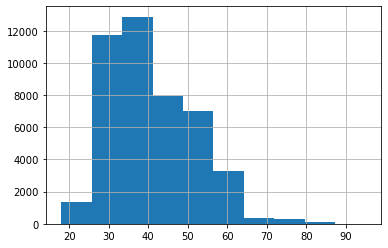

In [343]:
df.age.hist() # normal distribution

<AxesSubplot:>

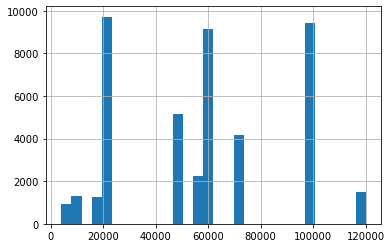

In [344]:
 df.monthly_salary.hist(bins=30) # looks like NORMAL DISTRIBUTION with some gaps

<AxesSubplot:>

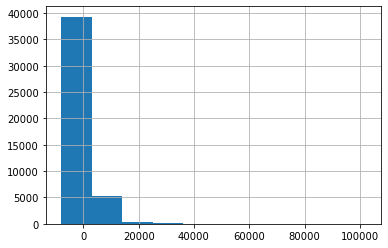

In [345]:
df.account_balance.hist() # EXPONENTIAL DISTRIBUTION

<AxesSubplot:>

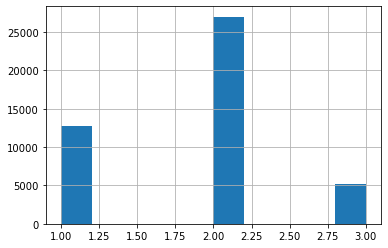

In [346]:
df.marital_status.hist() # BINOMIAL DISTRIBUTION

<AxesSubplot:>

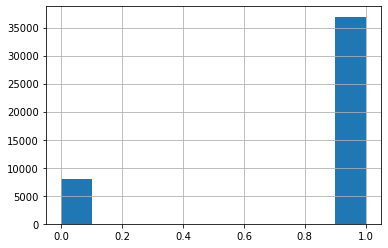

In [347]:
df.targeted_customer_yn.hist() # BERNOULLI DISTRIBUTION (All the categorical column with 2 values will have bernoulli distribution)

<AxesSubplot:>

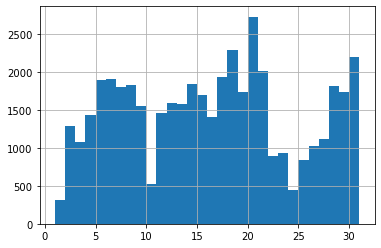

In [348]:
df.day_of_contact.hist(bins=30)

<AxesSubplot:>

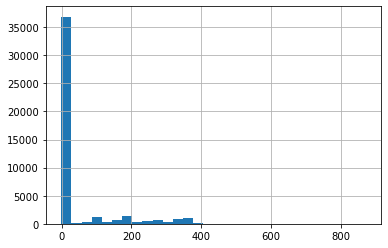

In [349]:
df.last_contacted_days.hist(bins=30) # EXPONENTIAL DISTRIBUTION

<AxesSubplot:>

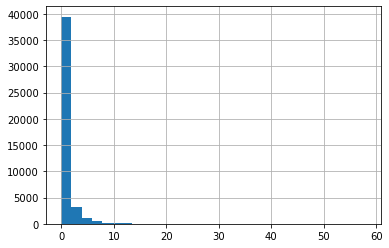

In [350]:
df.total_previous_contact.hist(bins=30) # EXPONENTIAL DISTRIBUTION

<AxesSubplot:>

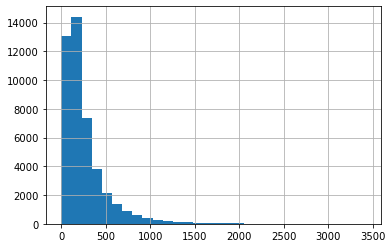

In [351]:
df.call_duration_sec.hist(bins=30) # EXPONENTIAL DISTRIBUTION

<AxesSubplot:>

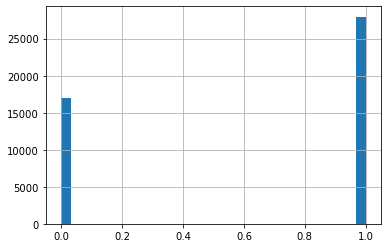

In [352]:
df.loan_yn.hist(bins=30) 
# this column is going to be predicted by the model.
# This column has some imbalance between two categories. it will impact ML model while training

In [353]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

<AxesSubplot:>

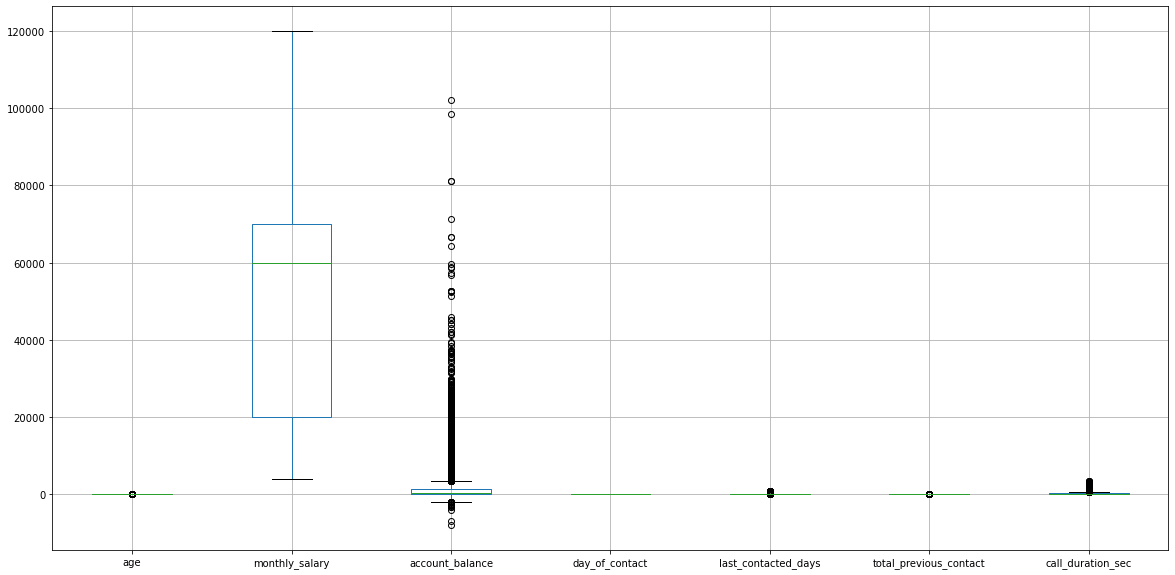

In [354]:
plt.figure(figsize=(20, 10))
df.boxplot(column = ['age', 'monthly_salary', 'account_balance', 'day_of_contact', 'last_contacted_days',
                     'total_previous_contact', 'call_duration_sec'])
# monthly_salary and account_balance has very high values compare to other columns

<AxesSubplot:>

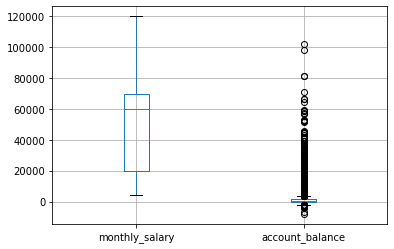

In [355]:
df.boxplot(column = ['monthly_salary', 'account_balance'])

<AxesSubplot:>

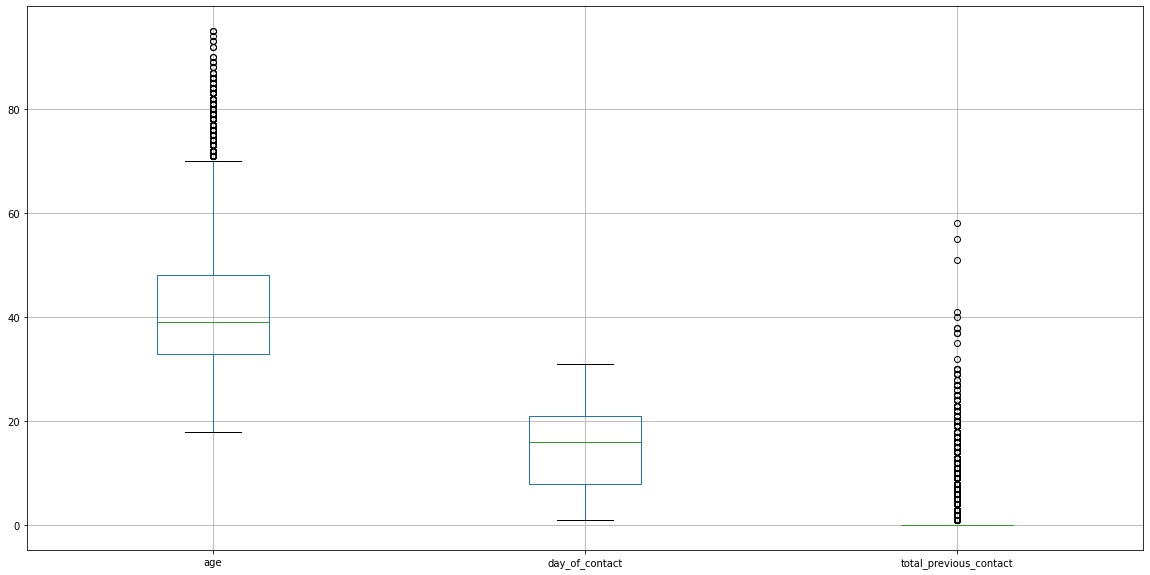

In [356]:
plt.figure(figsize=(20, 10))
df.boxplot(column = ['age', 'day_of_contact', 'total_previous_contact'])

<AxesSubplot:>

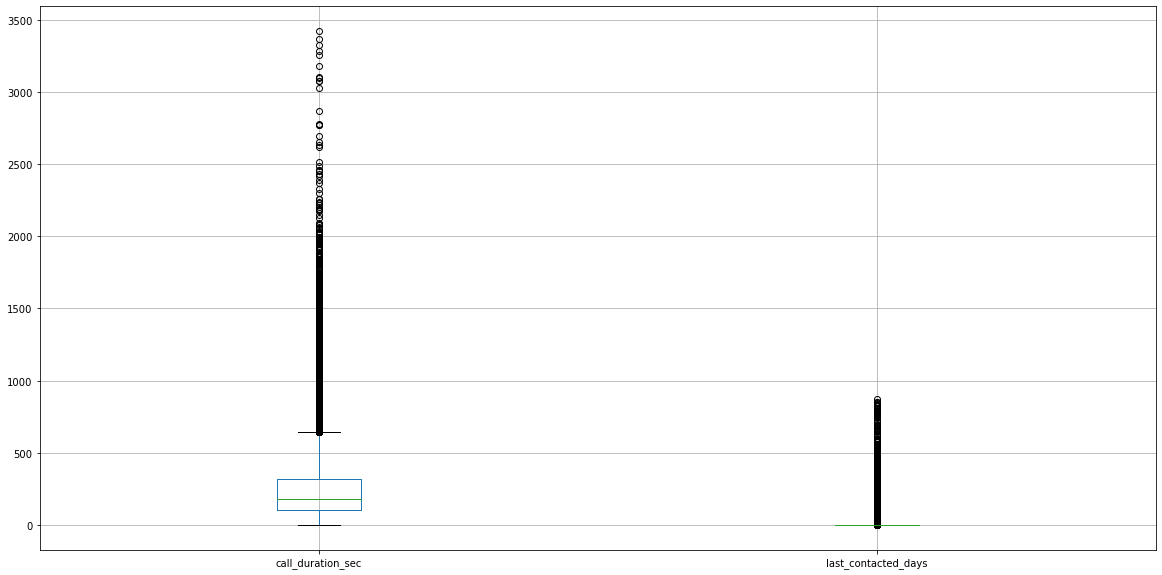

In [357]:
plt.figure(figsize=(20, 10))
df.boxplot(column = ['call_duration_sec',  'last_contacted_days',])

**Visualize categorical columns**

In [358]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

In [359]:
df_cat = df[['marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn', 'other_loan_yn',
             'contact_carrier', 'campaign', 'customer_responded_yn', 'job', 'education', 'month_of_contact', 'loan_yn']]

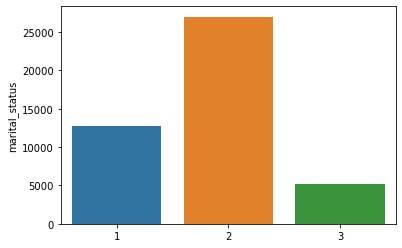

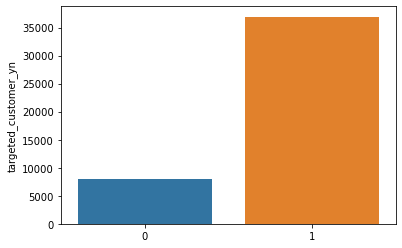

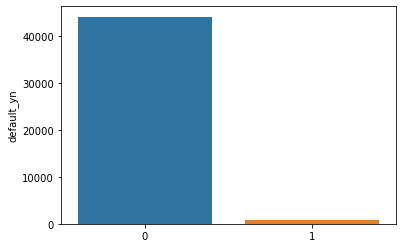

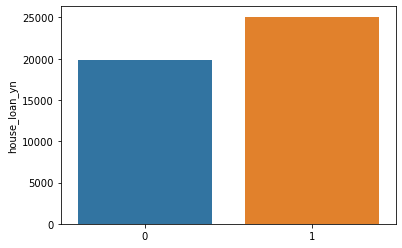

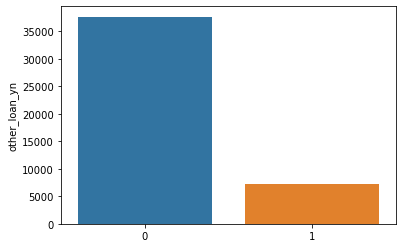

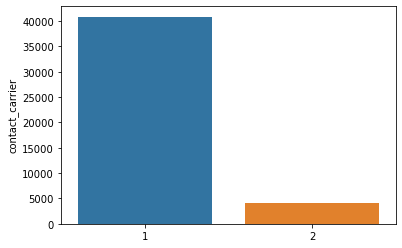

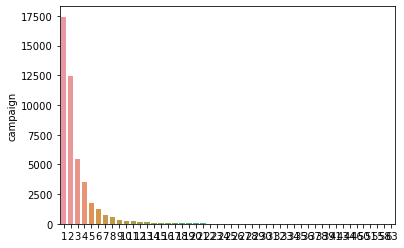

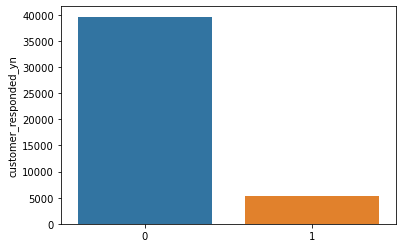

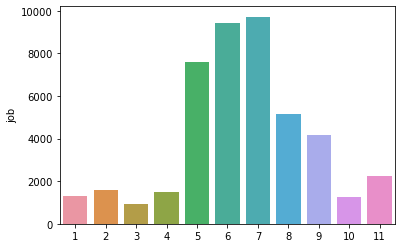

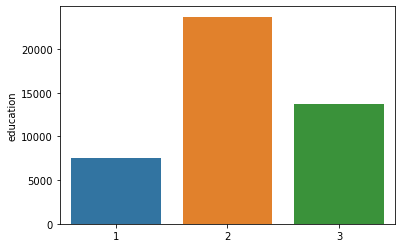

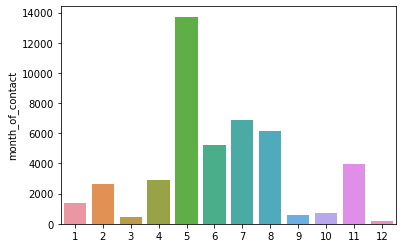

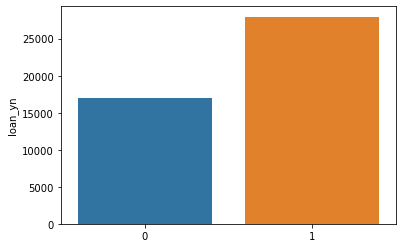

In [360]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

**Use pivot table to do EDA**

In [361]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

In [362]:
pd.pivot_table(df, index= ['marital_status'], values=['age', 'monthly_salary', 'account_balance'])

# based on marriage we can see clear difference in age and also married customer tend to have more account balance
# However monthly salary is relatively higher for divorced customer
# single customer tend to have less age, while married and divorced customer has higher age

account_balance        age  monthly_salary
marital_status                                            
1                   1299.095377  33.675499    57596.005661
2                   1423.704344  43.356802    56622.162142
3                   1175.909144  45.766590    60724.537037

In [363]:
pd.pivot_table(df, index= ['marital_status'], values=['house_loan_yn', 'other_loan_yn'])

# married and divorced customer tend to have taken house loan and other loan more than single person

house_loan_yn  other_loan_yn
marital_status                              
1                    0.541909       0.130445
2                    0.566720       0.172290
3                    0.558835       0.177469

In [364]:
pd.pivot_table(df, index= ['marital_status', 'loan_yn'], values=['call_duration_sec'])

# if married customer have taken a loan, then call duration will be less than if loan has not taken
# But, for divorced and single customer this trend is opposite

call_duration_sec
marital_status loan_yn                   
1              0               262.285122
               1               268.937312
2              0               255.434935
               1               252.023193
3              0               258.193462
               1               265.142857

In [365]:
pd.pivot_table(df, index= ['age'], values=['call_duration_sec'])

call_duration_sec
age                   
18          214.166667
19          175.485714
20          213.100000
21          208.658228
22          234.968992
..                 ...
90          354.500000
92          238.500000
93          668.000000
94          212.000000
95          211.000000

[77 rows x 1 columns]

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

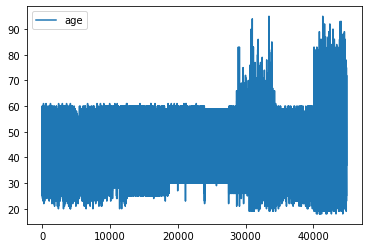

In [366]:
plt.figure(figsize=(20, 10))
df[['age']].plot.line()

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

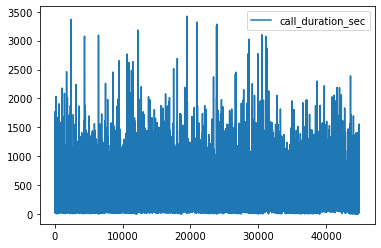

In [367]:
plt.figure(figsize=(20, 10))
df[['call_duration_sec']].plot.line()

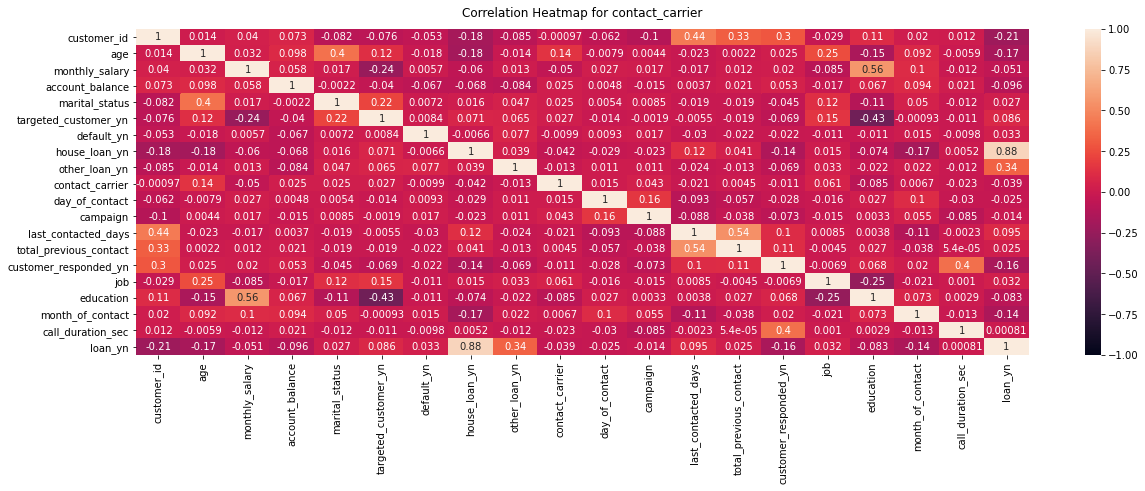

In [368]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for contact_carrier', fontdict={'fontsize':12}, pad=12);

In [369]:
pd.pivot_table(df, index= ['education'], values=['monthly_salary'])
# If education of the customer is higher, the monthly salary goes higher too

monthly_salary
education                
1            32725.754742
2            50035.242477
3            83480.545031

In [370]:
pd.pivot_table(df, index= ['education'], values=['targeted_customer_yn'])

# the targeted customers are who has less educated (primary and secondary)

targeted_customer_yn
education                      
1                      0.907694
2                      0.975900
3                      0.510857

In [371]:
pd.pivot_table(df, index= ['customer_responded_yn'], values=['call_duration_sec'])

# clear relation: most of the customer responded if the call duration time is high

call_duration_sec
customer_responded_yn                   
0                             221.019398
1                             537.144297

In [372]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

In [373]:
df_pivot = df[['age', 'monthly_salary', 'account_balance', 'marital_status', 'targeted_customer_yn',
               'last_contacted_days', 'total_previous_contact',
               'customer_responded_yn', 'education', 'call_duration_sec', 'loan_yn']]

In [374]:
for i in df_pivot.columns:
    print(i)
    if (i!='loan_yn'):
        print(pd.pivot_table(df_pivot, index='loan_yn', values=i))

age
               age
loan_yn           
0        43.186541
1        39.503487
monthly_salary
         monthly_salary
loan_yn                
0          59475.678867
1          56096.949540
account_balance
         account_balance
loan_yn                 
0            1736.763991
1            1131.440368
marital_status
         marital_status
loan_yn                
0              1.811393
1              1.844831
targeted_customer_yn
         targeted_customer_yn
loan_yn                      
0                    0.780047
1                    0.848049
last_contacted_days
         last_contacted_days
loan_yn                     
0                  28.012102
1                  47.751064
total_previous_contact
         total_previous_contact
loan_yn                        
0                      0.513872
1                      0.612917
customer_responded_yn
         customer_responded_yn
loan_yn                       
0                     0.183117
1                     0.077173
educatio

**EDA**

- Less aged customer tend to take loan
- monthly salary is lower for customer who has taken a loan
- account balance is lower for customer who has taken a loan
- married customer tend to take a loan
- customers who have taken a loan are the one who are targeted
- customers who have not taken a loan are contacted frequently
- most contact has been done for customers who took the loan
- customers don't responde much who took a loan
- more educated customer take loan less
- call duration time is almost similar for non loan taking and loan taking customers

# Build a Machine Learning Model

**Task: Predict whether the customer has taken a loan or not**

**Choose a relevent columns**

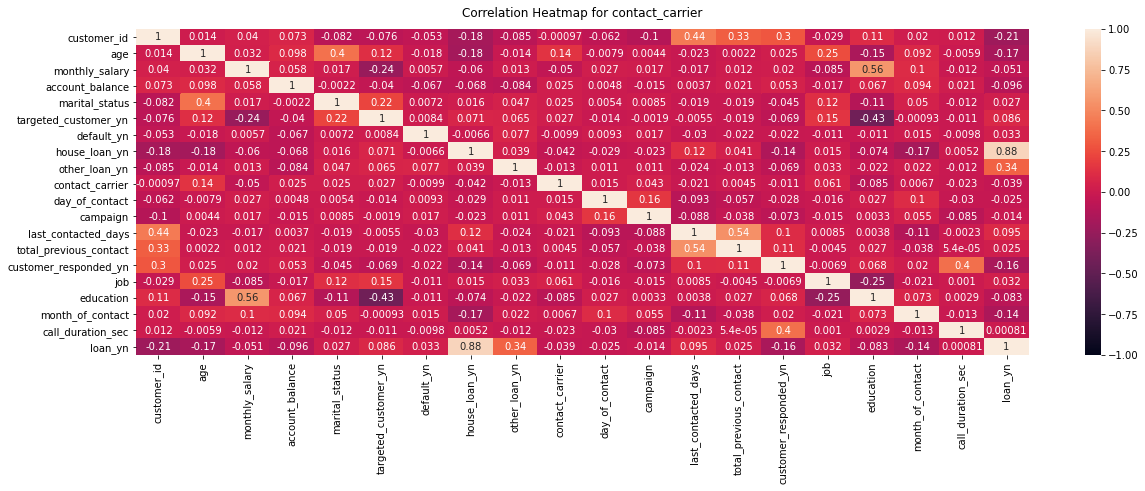

In [375]:
# using correlation heatmap to choose columns for ml model 
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for contact_carrier', fontdict={'fontsize':12}, pad=12);

In [376]:
df.columns

Index(['customer_id', 'age', 'monthly_salary', 'account_balance',
       'marital_status', 'targeted_customer_yn', 'default_yn', 'house_loan_yn',
       'other_loan_yn', 'contact_carrier', 'day_of_contact', 'campaign',
       'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec', 'loan_yn'],
      dtype='object')

In [377]:
df_model = df[[ 'loan_yn', 'age', 'monthly_salary', 'account_balance',
           'marital_status', 'targeted_customer_yn',
           'last_contacted_days', 'total_previous_contact',
           'customer_responded_yn', 'job', 'education', 'month_of_contact',
           'call_duration_sec']]

# house_loan and other_loan column is discarded because loan_yn column has been made from these 2 columns. 
# so if we add above 2 columns, then there will be high bias and model will learn only on those 2 columns.

# default_yn, contact_carrier, day_of_contact, campaign: these columns are not taken for model building,
# because it does not look relevent to our task


In [378]:
#change categorical columns int to categories
df_model.columns

Index(['loan_yn', 'age', 'monthly_salary', 'account_balance', 'marital_status',
       'targeted_customer_yn', 'last_contacted_days', 'total_previous_contact',
       'customer_responded_yn', 'job', 'education', 'month_of_contact',
       'call_duration_sec'],
      dtype='object')

In [379]:
# change marital_status column to categorical value
df_model['marital_status'].unique()

def conv_marital_status_to_cat(marital_status):
    if (marital_status == 2):
        return 'married'
    elif (marital_status == 1):
        return 'single'
    else:
        return 'divorced'

df_model['marital_status'] = df_model['marital_status'].apply(conv_marital_status_to_cat)
df_model['marital_status'].unique()

<ipython-input-379-600b72423cea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['marital_status'] = df_model['marital_status'].apply(conv_marital_status_to_cat)


array(['married', 'single', 'divorced'], dtype=object)

In [380]:
# change job column to categorical value

df_model['job'].unique()

def conv_job_to_cat(job_status):
    if (job_status == 1):
        return 'unemployed'
    elif (job_status == 2):
        return 'self-employed'
    elif (job_status == 3):
        return 'student'
    elif (job_status == 4):
        return 'entrepreneur'
    elif (job_status == 5):
        return 'technician'
    elif (job_status == 6):
        return 'management'
    elif (job_status == 7):
        return 'blue-collar'
    elif (job_status == 8):
        return 'admin'
    elif (job_status == 9):
        return 'services'
    elif (job_status == 10):
        return 'housemaid'
    elif (job_status == 11):
        return 'retired'
    else:
        raise ValueError
    
df_model['job'] = df_model['job'].apply(conv_job_to_cat)
df_model['job'].unique()

<ipython-input-380-a343c37fb641>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['job'] = df_model['job'].apply(conv_job_to_cat)


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [381]:
# change education column to categorical values

def conv_education_to_cat(education_level):
    if (education_level == 1):
        return 'primary'
    elif (education_level == 2):
        return 'secondary'
    elif (education_level == 3):
        return 'tertiary'
    else:
        raise ValueError
    
df_model['education'] = df_model['education'].apply(conv_education_to_cat)
df_model['education'].unique()

<ipython-input-381-483b0b16011e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['education'] = df_model['education'].apply(conv_education_to_cat)


array(['tertiary', 'secondary', 'primary'], dtype=object)

In [382]:
# change month_of_contact column to categorical values

def conv_month_to_cat(month_name):
    if (month_name == 1):
        return 'jan'
    elif (month_name == 2):
        return 'feb'
    elif (month_name == 3):
        return 'mar'
    elif (month_name == 4):
        return 'apr'
    elif (month_name == 5):
        return 'may'
    elif (month_name == 6):
        return 'jun'
    elif (month_name == 7):
        return 'jul'
    elif (month_name == 8):
        return 'aug'
    elif (month_name == 9):
        return 'sep'
    elif (month_name == 10):
        return 'oct'
    elif (month_name == 11):
        return 'nov'
    elif (month_name == 12):
        return 'dec'
    else:
        raise ValueError
    
df_model['month_of_contact'] = df_model['month_of_contact'].apply(conv_month_to_cat)
df_model['month_of_contact'].unique()

<ipython-input-382-ecf0bd0c919e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['month_of_contact'] = df_model['month_of_contact'].apply(conv_month_to_cat)


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [383]:
df_model

loan_yn  age  monthly_salary  account_balance marital_status  \
0            1   58          100000             2143        married   
1            1   44           60000               29         single   
2            1   33          120000                2        married   
3            1   47           20000             1506        married   
4            1   35          100000              231        married   
...        ...  ...             ...              ...            ...   
44898        0   51           60000              825        married   
44899        0   71           55000             1729       divorced   
44900        0   72           55000             5715        married   
44901        0   57           20000              668        married   
44902        0   37          120000             2971        married   

       targeted_customer_yn  last_contacted_days  total_previous_contact  \
0                         1                   -1                       0   
1                         1                   -1                       0   
2                         1                   -1                       0   
3                         0                   -1                       0   
4                         1                   -1                       0   
...                     ...                  ...                     ...   
44898                     1                   -1                       0   
44899                     1                   -1                       0   
44900                     1                  184                       3   
44901                     1                   -1                       0   
44902                     1                  188                      11   

       customer_responded_yn           job  education month_of_contact  \
0                          0    management   tertiary              may   
1                          0    technician  secondary              may   
2                          0  entrepreneur  secondary              may   
3                          0   blue-collar    primary              may   
4                          0    management   tertiary              may   
...                      ...           ...        ...              ...   
44898                      1    technician   tertiary              nov   
44899                      1       retired    primary              nov   
44900                      1       retired  secondary              nov   
44901                      0   blue-collar  secondary              nov   
44902                      0  entrepreneur  secondary              nov   

       call_duration_sec  
0                    261  
1                    151  
2                     76  
3                     92  
4                    139  
...                  ...  
44898                977  
44899                456  
44900               1127  
44901                508  
44902                361  

[44903 rows x 13 columns]

In [384]:
# get dummy values for df_model
df_dum = pd.get_dummies(df_model)
df_dum

loan_yn  age  monthly_salary  account_balance  targeted_customer_yn  \
0            1   58          100000             2143                     1   
1            1   44           60000               29                     1   
2            1   33          120000                2                     1   
3            1   47           20000             1506                     0   
4            1   35          100000              231                     1   
...        ...  ...             ...              ...                   ...   
44898        0   51           60000              825                     1   
44899        0   71           55000             1729                     1   
44900        0   72           55000             5715                     1   
44901        0   57           20000              668                     1   
44902        0   37          120000             2971                     1   

       last_contacted_days  total_previous_contact  customer_responded_yn  \
0                       -1                       0                      0   
1                       -1                       0                      0   
2                       -1                       0                      0   
3                       -1                       0                      0   
4                       -1                       0                      0   
...                    ...                     ...                    ...   
44898                   -1                       0                      1   
44899                   -1                       0                      1   
44900                  184                       3                      1   
44901                   -1                       0                      0   
44902                  188                      11                      0   

       call_duration_sec  marital_status_divorced  ...  month_of_contact_dec  \
0                    261                        0  ...                     0   
1                    151                        0  ...                     0   
2                     76                        0  ...                     0   
3                     92                        0  ...                     0   
4                    139                        0  ...                     0   
...                  ...                      ...  ...                   ...   
44898                977                        0  ...                     0   
44899                456                        1  ...                     0   
44900               1127                        0  ...                     0   
44901                508                        0  ...                     0   
44902                361                        0  ...                     0   

       month_of_contact_feb  month_of_contact_jan  month_of_contact_jul  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
44898                     0                     0                     0   
44899                     0                     0                     0   
44900                     0                     0                     0   
44901                     0                     0                     0   
44902                     0                     0                     0   

       month_of_contact_jun  month_of_contact_mar  month_of_contact_may  \
0                         0                     0                     1   
1                         0                     0                     1   
2                         0                     0         

In [385]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44903 entries, 0 to 44902
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   loan_yn                  44903 non-null  int64
 1   age                      44903 non-null  int64
 2   monthly_salary           44903 non-null  int64
 3   account_balance          44903 non-null  int64
 4   targeted_customer_yn     44903 non-null  int64
 5   last_contacted_days      44903 non-null  int64
 6   total_previous_contact   44903 non-null  int64
 7   customer_responded_yn    44903 non-null  int64
 8   call_duration_sec        44903 non-null  int64
 9   marital_status_divorced  44903 non-null  uint8
 10  marital_status_married   44903 non-null  uint8
 11  marital_status_single    44903 non-null  uint8
 12  job_admin                44903 non-null  uint8
 13  job_blue-collar          44903 non-null  uint8
 14  job_entrepreneur         44903 non-null  uint8
 15  jo

**Split train and test set for model**

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
X = df_dum.drop('loan_yn', axis=1)
y = df_dum.loan_yn.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression Model**

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [482]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [483]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Accuracy: 62%

Accuracy of logistic regression classifier on test set: 0.62


**Support Vector Machine Classification Model**

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=100) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# this model took 45 min to train

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Accuracy: 53%

**Random Forest Classifier**

https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building

In [487]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# got Accuracy: 76.17%

Accuracy: 0.7617191849459971


**Decision Tree Classifier**

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [488]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Accuracy: 68.85%

Accuracy: 0.688564747800913
